# Load data

In [1]:
# load packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import copy # deepcopy new data to not interfere the original one

from sklearn.preprocessing import power_transform # transform the data close to normal distribution and standardise them

# K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# EM Algorithm
from sklearn import mixture

# plot the cluster distribution in 3D graph
from sklearn.decomposition import PCA # dimension reduction for plot preparation
from mpl_toolkits.mplot3d import Axes3D # produce 3D plot

# present cluster result
from sklearn.metrics import classification_report, confusion_matrix

# write/load files in the system
import os
import glob


#decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier

#hyperparameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
# assign master path to load files
#path_to_files = '/content/drive/My Drive/data/TwitterFeeds-master/'
path_to_files = '../ADS/climate/'

In [3]:
# load data
train = pd.read_csv(path_to_files + 'users_training_with_features.csv')
test = pd.read_csv(path_to_files + 'users_climate_with_features.csv')
print(train.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 85 columns):
Unnamed: 0                        19705 non-null int64
id                                19705 non-null int64
name                              19703 non-null object
username                          19705 non-null object
location                          11580 non-null object
url                               5672 non-null object
description                       12928 non-null object
followers                         19705 non-null int64
friends                           19705 non-null int64
favourites_count                  19705 non-null int64
statuses_count                    19705 non-null int64
default_profile                   12124 non-null float64
default_profile_image             8212 non-null float64
class                             19705 non-null object
date_created                      19705 non-null object
days_active                       19705 non-null int64
fo

In [4]:
train = train.iloc[:,1:] # drop extra index column

print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 84 columns):
id                                19705 non-null int64
name                              19703 non-null object
username                          19705 non-null object
location                          11580 non-null object
url                               5672 non-null object
description                       12928 non-null object
followers                         19705 non-null int64
friends                           19705 non-null int64
favourites_count                  19705 non-null int64
statuses_count                    19705 non-null int64
default_profile                   12124 non-null float64
default_profile_image             8212 non-null float64
class                             19705 non-null object
date_created                      19705 non-null object
days_active                       19705 non-null int64
followers_age                     19705 non-null float64


,id,name,username,location,url,description,followers,friends,favourites_count,statuses_count,...,hash_PT,username_urltitle_simimlarity,username_in_urltitle,username_name_similarity,username_in_bio,lower_userid,followers_friends_ratio,bio_sentiment_negative,bio_sentiment_neutral,bio_sentiment_positive
0,4925593090,Itan,c_nattC,"Río Negro, Argentina",NaN,"ι cяυмвℓιηg αgαιη, вυт, ι cαη'т sтσρ.",3324,2670,48470,8896,...,0.000000,NaN,NaN,0.200000,0,0,1.244944,0,1,0
1,4908982317,Cifra73,cifra73,NaN,NaN,"Non smetto mai di avere paura, non smetto mai ...",437,510,27708,30978,...,0.285000,NaN,NaN,1.000000,0,0,0.856863,0,1,0
2,4903929447,Gagan Singh,gaganxsingh,NaN,https://t.co/Mqu3NYKTwr,your beautiful dark twisted fantasy.,214,306,20973,2247,...,0.010204,0.415094,1.0,0.909091,0,0,0.699346,0,0,1
3,4900838982,Tony Aguilar,_Swaguilar_33,NaN,NaN,that’s wild,717,1132,79664,26303,...,0.041885,NaN,NaN,0.608696,0,0,0.633392,0,1,0
4,4905375501,Dmitry Korotnian,finance_dk,+ 38 098 879 80 59,NaN,"Financer, city man, assets manager",27,180,108,623,...,2.153061,NaN,NaN,0.320000,0,0,0.150000,0,0,1


In [5]:
test = test.iloc[:,1:] # drop extra index column
test.rename(columns={'retweet_countOT': 'OGTratio1','favourite_countOT': 'retweet_countOT','OGTratio': 'favourite_countOT'},inplace = True)
test.rename(columns={'OGTratio1': 'OGTratio'},inplace = True)

#test = test.drop(['verified'],axis = 1)
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 85 columns):
id                                6834 non-null int64
name                              6834 non-null object
username                          6834 non-null object
location                          5126 non-null object
url                               3050 non-null object
description                       6039 non-null object
followers                         6834 non-null int64
friends                           6834 non-null int64
favourites_count                  6834 non-null int64
statuses_count                    6834 non-null int64
default_profile                   6834 non-null int64
default_profile_image             6834 non-null int64
date_created                      6834 non-null object
days_active                       6834 non-null int64
followers_age                     6834 non-null float64
following_age                     6834 non-null float64
favourites_age     

,id,name,username,location,url,description,followers,friends,favourites_count,statuses_count,...,hash_PT,username_urltitle_simimlarity,username_in_urltitle,username_name_similarity,username_in_bio,lower_userid,followers_friends_ratio,bio_sentiment_negative,bio_sentiment_neutral,bio_sentiment_positive
0,914204469927260162,LJ,007_lj,NaN,NaN,NaN,1,92,15,32,...,0.84375,NaN,NaN,0.571429,0,0,0.010870,0,1,0
1,2588852462,💧 zero emissions noosa,0Thornton,"Queensland, Australia",NaN,Concerned for the future of our planet,252,324,21588,25374,...,0.21500,NaN,NaN,0.193548,0,0,0.777778,1,0,0
2,257857728,Michael Vincent 🇪🇺,0Vinz,Paris / Brussels / London / EU,https://t.co/Q8qIus4iO9,Auteur «le banquier et le citoyen» ➡️ https://...,2804,2468,14595,11453,...,0.35000,0.3,0.0,0.260870,0,1,1.136143,0,1,0
3,114771707,brian glennie,0briang,NaN,NaN,NaN,7,27,14,4326,...,0.04500,NaN,NaN,0.600000,0,1,0.259259,0,1,0
4,1232099440346812417,0retrocap,0retrocap,NaN,NaN,One two three,51,191,963,731,...,0.17000,NaN,NaN,1.000000,0,0,0.267016,0,1,0


In [6]:
# match the columns of train and test
test['class'] = np.nan
cols = train.columns.to_list()
test = test[cols]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 84 columns):
id                                6834 non-null int64
name                              6834 non-null object
username                          6834 non-null object
location                          5126 non-null object
url                               3050 non-null object
description                       6039 non-null object
followers                         6834 non-null int64
friends                           6834 non-null int64
favourites_count                  6834 non-null int64
statuses_count                    6834 non-null int64
default_profile                   6834 non-null int64
default_profile_image             6834 non-null int64
class                             0 non-null float64
date_created                      6834 non-null object
days_active                       6834 non-null int64
followers_age                     6834 non-null float64
following_age         

# Data Preprocessing for Clustering

Remove outliers and standardise the data. (Clustering methods are sensitive to outliers).

In [7]:
# there is no training/testing data in clustering, concatenate them to a single dataset
cluster_data = pd.concat([train, test], ignore_index=True)
print(cluster_data.info())
cluster_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26539 entries, 0 to 26538
Data columns (total 84 columns):
id                                26539 non-null int64
name                              26537 non-null object
username                          26539 non-null object
location                          16706 non-null object
url                               8722 non-null object
description                       18967 non-null object
followers                         26539 non-null int64
friends                           26539 non-null int64
favourites_count                  26539 non-null int64
statuses_count                    26539 non-null int64
default_profile                   18958 non-null float64
default_profile_image             15046 non-null float64
class                             19705 non-null object
date_created                      26539 non-null object
days_active                       26539 non-null int64
followers_age                     26539 non-null float64

,id,name,username,location,url,description,followers,friends,favourites_count,statuses_count,...,hash_PT,username_urltitle_simimlarity,username_in_urltitle,username_name_similarity,username_in_bio,lower_userid,followers_friends_ratio,bio_sentiment_negative,bio_sentiment_neutral,bio_sentiment_positive
0,4925593090,Itan,c_nattC,"Río Negro, Argentina",NaN,"ι cяυмвℓιηg αgαιη, вυт, ι cαη'т sтσρ.",3324,2670,48470,8896,...,0.000000,NaN,NaN,0.200000,0,0,1.244944,0,1,0
1,4908982317,Cifra73,cifra73,NaN,NaN,"Non smetto mai di avere paura, non smetto mai ...",437,510,27708,30978,...,0.285000,NaN,NaN,1.000000,0,0,0.856863,0,1,0
2,4903929447,Gagan Singh,gaganxsingh,NaN,https://t.co/Mqu3NYKTwr,your beautiful dark twisted fantasy.,214,306,20973,2247,...,0.010204,0.415094,1.0,0.909091,0,0,0.699346,0,0,1
3,4900838982,Tony Aguilar,_Swaguilar_33,NaN,NaN,that’s wild,717,1132,79664,26303,...,0.041885,NaN,NaN,0.608696,0,0,0.633392,0,1,0
4,4905375501,Dmitry Korotnian,finance_dk,+ 38 098 879 80 59,NaN,"Financer, city man, assets manager",27,180,108,623,...,2.153061,NaN,NaN,0.320000,0,0,0.150000,0,0,1
5,4902726274,Max Jones,JayGShore,NaN,NaN,#LFC,76,167,1948,569,...,0.600000,NaN,NaN,0.222222,0,0,0.455090,0,1,0
6,4897803268,حسین درخشان,h0d3r_fa,NaN,https://t.co/mnzE4YRMC6,نويسنده و پژوهشگر رسانه، گاهی طنزپرداز. ایرانی...,28855,5273,135353,45624,...,0.160000,0.000000,0.0,0.000000,0,0,5.472217,0,1,0
7,4895255141,Will Hayden,WillUSoccer,NaN,NaN,Some people say I'm random... I like to think ...,57,79,224,32,...,0.190476,NaN,NaN,0.454545,0,0,0.721519,0,0,1
8,4891838002,healing.ly,livehealingly,"Geneva, Switzerland",https://t.co/1F2gIB4cpp,Healing to find Joy and Peace. Helping when po...,20368,16402,9141,357227,...,1.160000,NaN,NaN,0.782609,1,0,1.241800,1,0,0
9,4885227823,Jono ☔️.,1jono_,EAST ATLANTA ZONE 6 ⚡️,NaN,it’s dipset bitch 🦅. #siuc21 🐾 LongLiveSK 🎈,303,0,7237,5316,...,0.043165,NaN,NaN,0.615385,0,0,NaN,1,0,0


In [8]:
### parameters

# save the classification results
data_entries = []

pre_KM = []
pre_EM = []
rec_KM = []
rec_EM = []
f1_score_KM = []
f1_score_EM = []
acc_KM = []
acc_EM = []

# decide outlier
k = 20

In [9]:
# filter out only numeric columns and also drop features with many missing values
cluster_data_toclust = cluster_data.drop(['id', 'name', 'username', 'location', 'url', 'description', 'default_profile', 'default_profile_image', 'date_created', 
                           'swears', 'polite', 'fourchan', 'username_in_urltitle', 'username_in_bio', 'lower_userid', 
                           'bio_sentiment_negative', 'bio_sentiment_neutral', 'bio_sentiment_positive', 'username_urltitle_simimlarity'], axis = 1)
print(cluster_data_toclust.info())
cluster_data_toclust.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26539 entries, 0 to 26538
Data columns (total 65 columns):
followers                         26539 non-null int64
friends                           26539 non-null int64
favourites_count                  26539 non-null int64
statuses_count                    26539 non-null int64
class                             19705 non-null object
days_active                       26539 non-null int64
followers_age                     26539 non-null float64
following_age                     26539 non-null float64
favourites_age                    26539 non-null float64
tweets_age                        26539 non-null float64
username_char_len                 26539 non-null int64
name_ratio                        26537 non-null float64
username_int                      26539 non-null int64
username_char                     26539 non-null int64
username_other                    26539 non-null int64
username_int_end                  26539 non-null int64


,followers,friends,favourites_count,statuses_count,days_active,followers_age,following_age,favourites_age,tweets_age,username_char_len,...,pnouns_OT,padj_OT,pverbs_OT,padv_OT,ppron_OT,Gun_Index,tot_hashtags,hash_PT,username_name_similarity,followers_friends_ratio
count,2.653900e+04,2.653900e+04,26539.000000,2.653900e+04,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,...,26532.000000,26536.000000,26536.000000,26536.000000,26536.000000,26536.000000,26536.000000,26536.000000,26539.000000,2.510000e+04
mean,9.395492e+04,1.733730e+03,8080.457666,1.486151e+04,2844.526056,24.264541,0.760961,4.052702,5.652335,11.313727,...,17.772358,5.944060,12.144612,4.876508,7.126053,4.279449,68.907597,0.411558,0.638609,5.101505e+02
std,2.050639e+06,1.579912e+04,26021.420037,4.684768e+04,981.797199,501.495473,5.705901,15.287835,18.153236,2.564195,...,6.350472,3.358786,5.110800,3.078233,4.617232,2.387705,146.408676,0.780653,0.302260,1.844901e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,10.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.500000e+01,8.500000e+01,0.000000,6.400000e+01,2257.000000,0.005666,0.036812,0.000000,0.027957,9.000000,...,15.625000,4.479647,10.468526,2.958580,3.479836,2.865952,6.000000,0.055000,0.400000,1.392748e-01
50%,2.120000e+02,3.690000e+02,505.000000,1.947000e+03,2869.000000,0.087912,0.137079,0.200615,0.829125,11.000000,...,18.001689,6.250000,13.591796,5.254248,7.110459,3.976747,16.000000,0.142857,0.666667,5.452421e-01
75%,1.261000e+03,1.009500e+03,5009.500000,1.201100e+04,3639.500000,0.525119,0.389992,2.056054,4.454545,13.000000,...,20.593510,7.464467,15.183693,6.797044,10.588235,5.445730,79.000000,0.460000,0.952381,1.383370e+00
max,1.069380e+08,1.180137e+06,910116.000000,1.948843e+06,5046.000000,26178.219829,447.699924,556.993209,685.618614,15.000000,...,400.000000,100.000000,100.000000,100.000000,100.000000,40.200000,4302.000000,21.510000,1.000000,1.643422e+06


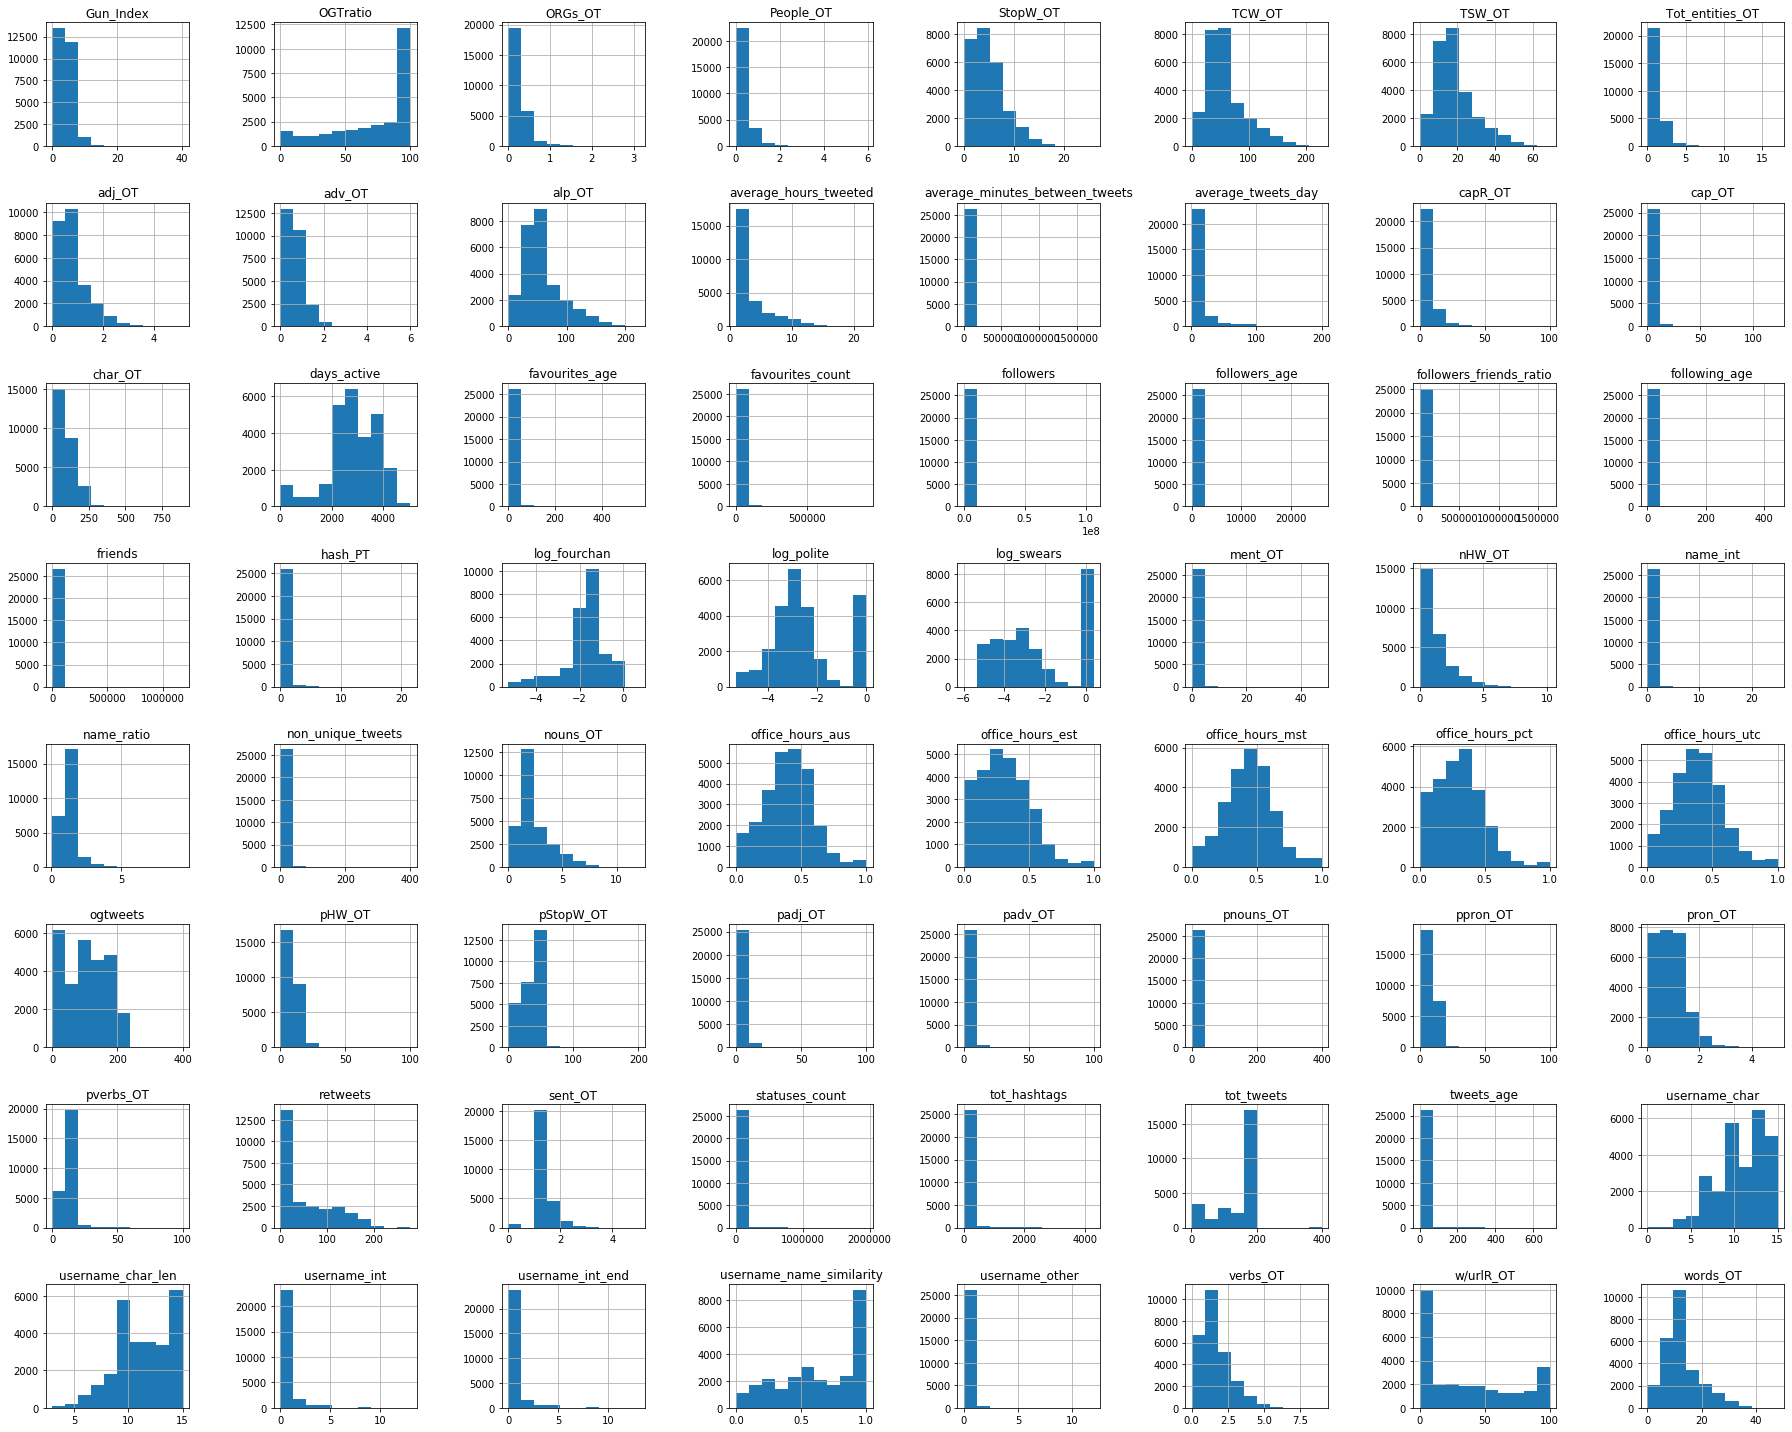

In [10]:
cluster_data_toclust.hist(figsize=[25,20])
plt.tight_layout()
# plt.savefig('raw_data_distribution.png')
plt.show()

In [11]:
# implement log-transformation for us to see the pattern more clearly
no_transform_col = ['alp_OT', 'char_OT', 'days_active', 'log_swears', 'log_polite', 'log_fourchan', 'name_int', 'nouns_OT', 'office_hours_aus', 
                               'office_hours_est', 'office_hours_mst', 'office_hours_pct', 'office_hours_utc', 'ogtweets', 'ppron_OT', 'pron_OT', 
                               'pStopW_OT', 'pverbs_OT', 'retweets', 'sent_OT', 'StopW_OT', 'TCW_OT', 'tot_tweets', 'TSW_OT', 
                               'username_char', 'username_char_len', 'username_int', 'username_int_end', 'username_name_similarity', 'username_other',
                               'verbs_OT', 'w/urlR_OT', 'words_OT', 'class']

old_col = []
add_col = []
for col in cluster_data_toclust.drop(no_transform_col, axis = 1, errors='ignore').columns:
  
  old_col.append(col)
  new_col = 'log_' + col
  add_col.append(new_col)
  cluster_data_toclust[new_col] = np.log(cluster_data_toclust[col] + 0.00001)

cluster_data_toclust = cluster_data_toclust.drop(old_col, axis = 1)

In [12]:
# drop NA values
cluster_data_toclust = cluster_data_toclust.loc[:,cluster_data_toclust.columns.isin(cluster_data_toclust.columns.tolist() + no_transform_col)]
# cluster_data_toclust = cluster_data_toclust[no_transform_col + add_col]

no_class_col = cluster_data_toclust.columns.tolist()
no_class_col.remove('class')
cluster_data_toclust = cluster_data_toclust.dropna(subset = no_class_col)
print(cluster_data_toclust.info())
cluster_data_toclust.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25091 entries, 0 to 26538
Data columns (total 65 columns):
class                                 18298 non-null object
days_active                           25091 non-null int64
username_char_len                     25091 non-null int64
username_int                          25091 non-null int64
username_char                         25091 non-null int64
username_other                        25091 non-null int64
username_int_end                      25091 non-null int64
name_int                              25091 non-null float64
log_swears                            25091 non-null float64
log_polite                            25091 non-null float64
log_fourchan                          25091 non-null float64
office_hours_utc                      25091 non-null float64
office_hours_est                      25091 non-null float64
office_hours_pct                      25091 non-null float64
office_hours_mst                      25091 non-nu

,days_active,username_char_len,username_int,username_char,username_other,username_int_end,name_int,log_swears,log_polite,log_fourchan,...,log_People_OT,log_ORGs_OT,log_pHW_OT,log_pnouns_OT,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio
count,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,...,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000
mean,2827.058746,11.296879,0.456379,10.704197,0.136304,0.382488,0.052170,-2.467596,-2.494912,-1.672659,...,-1.817401,-2.326871,1.493762,2.512584,1.151856,0.646939,1.055340,2.039337,-2.477172,-0.557916
std,995.158894,2.566963,1.215271,2.852174,0.413109,1.154958,0.424006,1.887479,1.383365,0.951763,...,2.421345,2.516396,2.925447,2.302502,2.795211,3.267846,2.029145,4.194830,2.931938,2.432049
min,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.991465,-5.298317,-5.298317,...,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925
25%,2256.000000,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,-3.912023,-3.352407,-1.966113,...,-1.791699,-2.466097,1.742331,2.766657,1.569104,1.195126,1.064188,1.791761,-2.900240,-1.971834
50%,2866.000000,11.000000,0.000000,11.000000,0.000000,0.000000,0.000000,-2.883403,-2.772589,-1.574695,...,-1.324014,-1.704693,2.116185,2.899258,1.844675,1.681184,1.385511,2.772589,-1.945840,-0.606485
75%,3650.500000,13.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,-2.079442,-1.215767,...,-0.890949,-1.131371,2.459671,3.029899,2.018194,1.921882,1.699963,4.343806,-0.809659,0.324557
max,5046.000000,15.000000,13.000000,15.000000,12.000000,13.000000,25.000000,0.405465,0.000000,0.693147,...,1.779785,1.134425,4.605170,5.991465,4.605170,4.605170,3.693867,8.366835,3.068518,14.312291


In [13]:
# only keep the records without any outlier
for col in cluster_data_toclust.drop(['class'], axis = 1).columns:
  Q1 = cluster_data_toclust[col].quantile(.25)
  Q3 = cluster_data_toclust[col].quantile(.75)
  IQR = Q3 - Q1

  cluster_data_toclust = cluster_data_toclust.loc[cluster_data_toclust[col].between(Q1-k*IQR, Q3+k*IQR)]

print(cluster_data_toclust.info())
data_entries.append(len(cluster_data_toclust))
cluster_data_toclust.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13727 entries, 2 to 26537
Data columns (total 65 columns):
class                                 10309 non-null object
days_active                           13727 non-null int64
username_char_len                     13727 non-null int64
username_int                          13727 non-null int64
username_char                         13727 non-null int64
username_other                        13727 non-null int64
username_int_end                      13727 non-null int64
name_int                              13727 non-null float64
log_swears                            13727 non-null float64
log_polite                            13727 non-null float64
log_fourchan                          13727 non-null float64
office_hours_utc                      13727 non-null float64
office_hours_est                      13727 non-null float64
office_hours_pct                      13727 non-null float64
office_hours_mst                      13727 non-nu

,days_active,username_char_len,username_int,username_char,username_other,username_int_end,name_int,log_swears,log_polite,log_fourchan,...,log_People_OT,log_ORGs_OT,log_pHW_OT,log_pnouns_OT,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio
count,13727.000000,13727.000000,13727.0,13727.000000,13727.0,13727.0,13727.0,13727.000000,13727.000000,13727.000000,...,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000
mean,2827.044657,11.414730,0.0,11.414730,0.0,0.0,0.0,-2.641171,-2.639146,-1.691874,...,-1.396745,-1.969403,2.050533,2.889748,1.777598,1.547357,1.375920,2.567690,-2.100383,-0.608916
std,941.944972,2.531169,0.0,2.531169,0.0,0.0,0.0,1.752145,1.239655,0.785913,...,1.280686,1.483248,0.899483,0.203503,0.422019,0.696425,0.419514,2.867213,2.068942,2.507917
min,11.000000,3.000000,0.0,3.000000,0.0,0.0,0.0,-5.298317,-5.298317,-5.298317,...,-11.512925,-11.512925,-11.512925,1.007056,-2.528798,-3.146073,-4.969529,-11.512925,-11.512925,-11.512925
25%,2255.000000,10.000000,0.0,10.000000,0.0,0.0,0.0,-3.912023,-3.352407,-1.931022,...,-1.654506,-2.484787,1.759091,2.784405,1.675029,1.424246,1.079789,1.791761,-2.733214,-2.302485
50%,2838.000000,12.000000,0.0,12.000000,0.0,0.0,0.0,-2.995732,-2.833213,-1.584745,...,-1.305496,-1.734544,2.086010,2.891775,1.860308,1.760816,1.353129,2.639058,-1.975991,-0.833100
75%,3590.000000,13.000000,0.0,13.000000,0.0,0.0,0.0,-0.955511,-2.302585,-1.280934,...,-0.944436,-1.202067,2.415286,3.020644,2.017291,1.940327,1.667095,4.158883,-0.970753,0.410649
max,5046.000000,15.000000,0.0,15.000000,0.0,0.0,0.0,0.405465,0.000000,0.157004,...,1.665150,0.693152,3.972543,3.912023,3.624341,3.624341,3.062435,8.090402,2.792086,14.312291


In [14]:
# transform data to normal-like distribution and do standardisation simultaneously
cluster_data_toclust[cluster_data_toclust.drop(['class'], axis = 1).columns] = power_transform(cluster_data_toclust.drop(['class'], axis = 1), method='yeo-johnson')
cluster_data_toclust.describe()

,days_active,username_char_len,username_int,username_char,username_other,username_int_end,name_int,log_swears,log_polite,log_fourchan,...,log_People_OT,log_ORGs_OT,log_pHW_OT,log_pnouns_OT,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio
count,1.372700e+04,1.372700e+04,13727.0,1.372700e+04,13727.0,13727.0,13727.0,1.372700e+04,1.372700e+04,1.372700e+04,...,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04
mean,-1.222405e-14,-8.585614e-15,0.0,-8.585614e-15,0.0,0.0,0.0,3.662434e-16,-4.182302e-16,-1.860697e-16,...,2.636729e-16,2.532997e-17,-4.982618e-16,3.849830e-17,-8.469961e-17,1.153803e-15,1.618093e-15,2.660653e-15,-4.039547e-15,-3.562993e-16
std,1.000036e+00,1.000036e+00,0.0,1.000036e+00,0.0,0.0,0.0,1.000036e+00,1.000036e+00,1.000036e+00,...,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-2.547273e+00,-2.564355e+00,0.0,-2.564355e+00,0.0,0.0,0.0,-1.535529e+00,-2.698746e+00,-3.463050e+00,...,-4.772247e+00,-3.532489e+00,-4.070010e+00,-4.626807e+00,-2.753273e+00,-2.366464e+00,-6.929587e+00,-2.477835e+00,-3.281615e+00,-5.919508e+00
25%,-6.633473e-01,-6.343051e-01,0.0,-6.343051e-01,0.0,0.0,0.0,-7.240433e-01,-5.521117e-01,-4.126552e-01,...,-4.390405e-01,-6.643772e-01,-7.626681e-01,-6.010244e-01,-4.752619e-01,-5.648575e-01,-7.565903e-01,-6.666751e-01,-4.850126e-01,-6.703553e-01
50%,-3.644092e-02,1.617694e-01,0.0,1.617694e-01,0.0,0.0,0.0,-1.927186e-01,-5.940917e-02,3.670856e-02,...,-8.613454e-02,-2.881680e-02,-8.957003e-02,-7.178287e-02,6.224422e-02,1.871740e-01,-1.078227e-01,-2.285333e-01,-1.056511e-01,1.366879e-02
75%,8.202460e-01,5.975290e-01,0.0,5.975290e-01,0.0,0.0,0.0,9.699923e-01,4.058104e-01,4.702370e-01,...,3.318596e-01,5.667257e-01,6.799969e-01,6.262044e-01,5.843708e-01,6.674279e-01,6.915613e-01,7.176862e-01,4.952082e-01,5.160876e-01
max,2.604168e+00,1.542348e+00,0.0,1.542348e+00,0.0,0.0,0.0,1.718580e+00,1.895704e+00,3.486698e+00,...,8.148430e+00,6.281883e+00,5.616457e+00,7.737385e+00,1.051840e+01,8.504121e+00,4.876205e+00,3.970840e+00,5.744434e+00,4.307695e+00


In [15]:
# drop meaningless columns (0 variance)
meaningful_col = np.where(cluster_data_toclust.std(axis = 0) != 0)[0]
meaningful_col = cluster_data_toclust.drop('class', axis = 1).iloc[:,meaningful_col].columns.tolist()
meaningful_col.append('class')
cluster_data_toclust = cluster_data_toclust[meaningful_col]
cluster_data_toclust.head()

,days_active,username_char_len,username_char,log_swears,log_polite,log_fourchan,office_hours_utc,office_hours_est,office_hours_pct,office_hours_mst,...,log_ORGs_OT,log_pHW_OT,log_pnouns_OT,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio,class
2,-1.381389,-0.248999,-0.248999,0.389027,-2.674186,-0.431054,-1.245703,-0.081035,0.981901,-0.551356,...,-0.514988,-1.176119,-0.475724,-0.148899,0.379464,-1.390639,-1.124515,-1.258265,0.216542,human
7,-1.378541,-0.248999,-0.248999,1.499108,0.364715,0.245145,1.021867,-0.734585,-1.361095,2.089745,...,-3.532489,0.775118,0.744140,1.398754,1.569849,0.546366,-0.851110,0.069840,0.229444,human
13,-1.371891,-0.248999,-0.248999,1.499108,-2.698746,-2.960740,3.041205,3.042609,-1.644093,-0.986429,...,0.867860,0.824259,0.997181,4.745087,-0.913496,0.718739,2.188057,2.232605,0.329385,human
16,-1.366185,-0.634305,-0.634305,0.214812,0.101444,0.075755,-0.477169,-0.946877,-0.008017,-0.134397,...,-3.532489,-0.379743,0.354506,-0.805396,1.596332,-0.295807,-0.971272,-0.932488,0.396320,human
20,-1.358569,-1.909454,-1.909454,1.499108,1.895704,-3.459571,-0.434565,-1.106950,-0.946344,0.428710,...,-0.604851,-2.195759,0.931075,-1.681882,-2.300582,-2.569826,-1.337837,-1.514537,0.826950,human


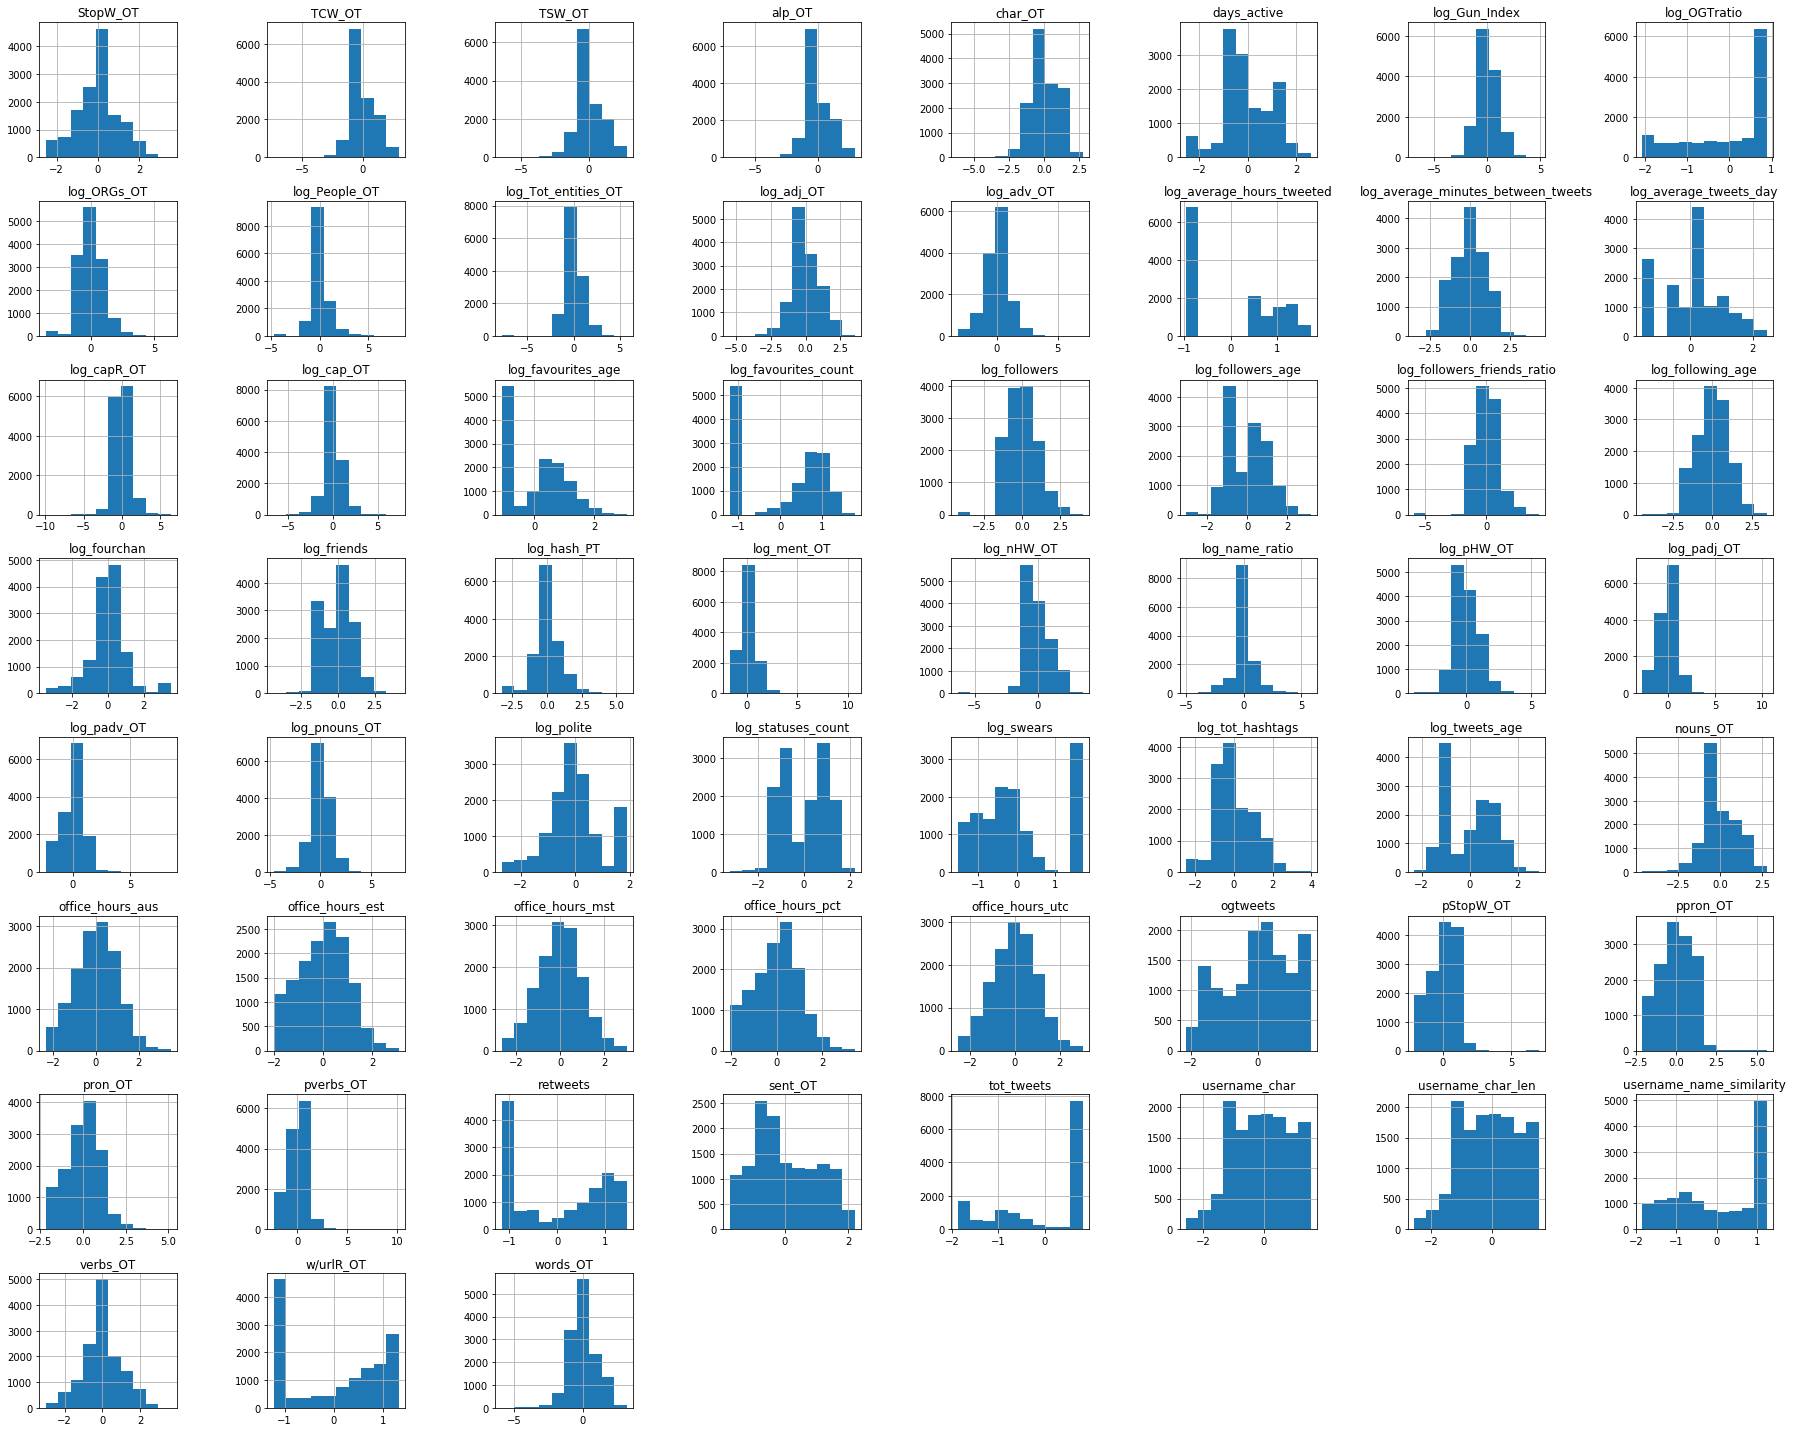

In [16]:
cluster_data_toclust.hist(figsize=[25,20])
plt.tight_layout()
# plt.savefig('pre-processed_data_distribution.png')
plt.show()

In [17]:
print(cluster_data_toclust['class'].value_counts())
print(cluster_data_toclust['class'].value_counts().index[0] + ':' + cluster_data_toclust['class'].value_counts().index[1] + ' = ' + str(round(cluster_data_toclust['class'].value_counts()[0]/sum(cluster_data_toclust['class'].value_counts()), 2)) + ':' + str(round(cluster_data_toclust['class'].value_counts()[1]/sum(cluster_data_toclust['class'].value_counts()), 2)))

bot      5508
human    4801
Name: class, dtype: int64
bot:human = 0.53:0.47


In [18]:
# clustered user group
test_ind = cluster_data_toclust[pd.isnull(cluster_data_toclust['class'])].index
test_username = cluster_data.loc[test_ind, 'username']

# Bot/Human Clustering

In [19]:
# # drop 'class' to ready the model
noclass_cluster_data = cluster_data_toclust.drop(['class'], axis = 1)
noclass_cluster_data.head()

,days_active,username_char_len,username_char,log_swears,log_polite,log_fourchan,office_hours_utc,office_hours_est,office_hours_pct,office_hours_mst,...,log_People_OT,log_ORGs_OT,log_pHW_OT,log_pnouns_OT,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio
2,-1.381389,-0.248999,-0.248999,0.389027,-2.674186,-0.431054,-1.245703,-0.081035,0.981901,-0.551356,...,-0.527734,-0.514988,-1.176119,-0.475724,-0.148899,0.379464,-1.390639,-1.124515,-1.258265,0.216542
7,-1.378541,-0.248999,-0.248999,1.499108,0.364715,0.245145,1.021867,-0.734585,-1.361095,2.089745,...,0.145763,-3.532489,0.775118,0.744140,1.398754,1.569849,0.546366,-0.851110,0.069840,0.229444
13,-1.371891,-0.248999,-0.248999,1.499108,-2.698746,-2.960740,3.041205,3.042609,-1.644093,-0.986429,...,3.286495,0.867860,0.824259,0.997181,4.745087,-0.913496,0.718739,2.188057,2.232605,0.329385
16,-1.366185,-0.634305,-0.634305,0.214812,0.101444,0.075755,-0.477169,-0.946877,-0.008017,-0.134397,...,0.554361,-3.532489,-0.379743,0.354506,-0.805396,1.596332,-0.295807,-0.971272,-0.932488,0.396320
20,-1.358569,-1.909454,-1.909454,1.499108,1.895704,-3.459571,-0.434565,-1.106950,-0.946344,0.428710,...,0.482932,-0.604851,-2.195759,0.931075,-1.681882,-2.300582,-2.569826,-1.337837,-1.514537,0.826950


Use elbow plot and silhouette plot to support our choice of number of clusters.

In [20]:
# K-means
kMin = 1
kMax = 8
repsPerK = 10 # the number of times restart with different centroids
kValues = np.zeros( kMax - kMin + 1)
sumOfSquares = np.zeros( kMax - kMin + 1)

for k in range(kMin, kMax+1):
    kValues[k - kMin] = k
    kmeansResult = KMeans( k, n_init=repsPerK ).fit(noclass_cluster_data)
    sumOfSquares[k - kMin] = kmeansResult.inertia_ # inertia_: sum of squared distances

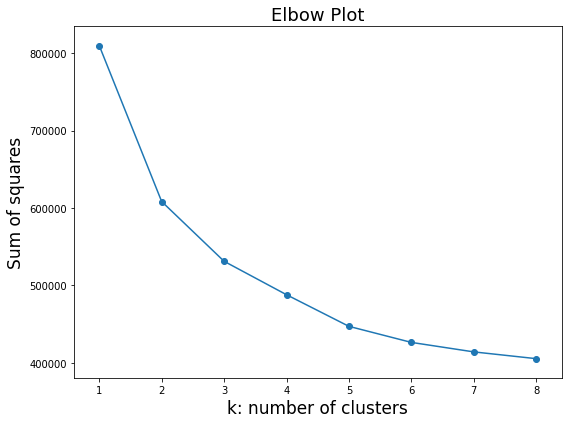

In [21]:
# elbow plot
elbowFig = plt.figure(figsize=[8,6])
plt.plot( kValues, sumOfSquares )
plt.scatter( x=kValues, y=sumOfSquares )
plt.xlabel('k: number of clusters', fontsize=17)
plt.ylabel('Sum of squares', fontsize=17)
plt.title('Elbow Plot', fontsize=18)
plt.tight_layout()
# plt.savefig('Elbow_Plot.png')
plt.show()

In [22]:
# silhouette score plot
sil = []

for k in range(2, kMax + 1):
    kmeansResult = KMeans( k, n_init=repsPerK ).fit(noclass_cluster_data)
    
    labels = kmeansResult.labels_
    sil.append(silhouette_score(noclass_cluster_data, labels, metric = 'euclidean'))

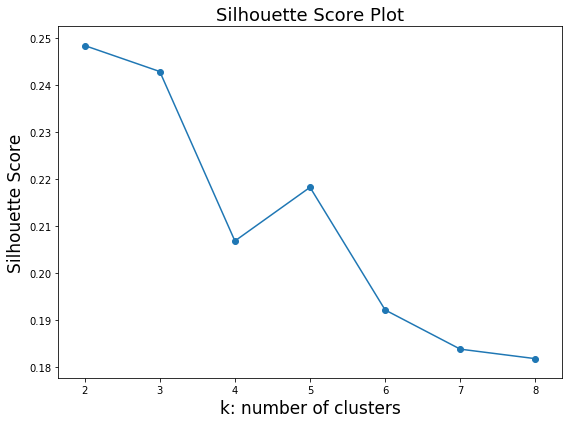

In [23]:
silFig = plt.figure(figsize=[8,6])
plt.plot( np.arange(2, kMax+1), sil )
plt.scatter( x=np.arange(2, kMax+1), y=sil )
plt.xlabel('k: number of clusters', fontsize=17)
plt.ylabel('Silhouette Score', fontsize=17)
plt.title('Silhouette Score Plot', fontsize=18)
plt.tight_layout()
# plt.savefig('Silhouette_Score.png')
plt.show()

Both elbow plot and silhouette score plot suggest there are 2 classes -- bot & human.

In [24]:
# copy data in case
data_clustered = copy.deepcopy(cluster_data_toclust)

## 1. K-means

In [25]:
kmeansResult = KMeans(2, n_init = 30).fit(noclass_cluster_data)
data_clustered['kmeans_clust'] = kmeansResult.predict(noclass_cluster_data)
data_clustered

,days_active,username_char_len,username_char,log_swears,log_polite,log_fourchan,office_hours_utc,office_hours_est,office_hours_pct,office_hours_mst,...,log_pHW_OT,log_pnouns_OT,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio,class,kmeans_clust
2,-1.381389,-0.248999,-0.248999,0.389027,-2.674186,-0.431054,-1.245703,-0.081035,0.981901,-0.551356,...,-1.176119,-0.475724,-0.148899,0.379464,-1.390639,-1.124515,-1.258265,0.216542,human,0
7,-1.378541,-0.248999,-0.248999,1.499108,0.364715,0.245145,1.021867,-0.734585,-1.361095,2.089745,...,0.775118,0.744140,1.398754,1.569849,0.546366,-0.851110,0.069840,0.229444,human,0
13,-1.371891,-0.248999,-0.248999,1.499108,-2.698746,-2.960740,3.041205,3.042609,-1.644093,-0.986429,...,0.824259,0.997181,4.745087,-0.913496,0.718739,2.188057,2.232605,0.329385,human,1
16,-1.366185,-0.634305,-0.634305,0.214812,0.101444,0.075755,-0.477169,-0.946877,-0.008017,-0.134397,...,-0.379743,0.354506,-0.805396,1.596332,-0.295807,-0.971272,-0.932488,0.396320,human,0
20,-1.358569,-1.909454,-1.909454,1.499108,1.895704,-3.459571,-0.434565,-1.106950,-0.946344,0.428710,...,-2.195759,0.931075,-1.681882,-2.300582,-2.569826,-1.337837,-1.514537,0.826950,human,0
22,-1.357616,-0.634305,-0.634305,-1.535529,1.895704,-2.218761,0.616777,1.528839,0.737483,0.248912,...,1.180985,-0.766204,-1.970598,-2.186386,1.048802,-0.525658,-0.705634,0.992933,human,1
24,-1.355710,0.597529,0.597529,1.499108,0.215043,0.196124,0.085382,0.938879,0.401024,-0.297462,...,-0.024099,-0.484828,0.297191,1.015728,0.141527,0.466536,0.153317,0.804153,human,1
32,-1.344262,-0.993628,-0.993628,-1.535529,-0.705240,-0.211530,-0.978199,-0.796395,-0.219732,-0.652932,...,-1.703535,2.281199,0.179012,1.820677,0.288247,0.058954,-0.203856,0.184184,human,1
33,-1.343307,1.542348,1.542348,1.499108,0.913105,1.258708,0.256375,-0.673287,-1.154679,0.885794,...,0.589773,0.184663,0.140055,-0.029428,0.656341,1.298756,0.977617,0.735640,human,1
34,-1.342352,0.597529,0.597529,-1.128751,-2.698746,-0.909813,-1.507468,-1.081105,0.314920,-0.955795,...,-1.461169,0.602851,-1.718481,-1.701729,-1.224142,-0.465582,-0.653491,-0.397360,human,0


In [26]:
print(data_clustered.loc[data_clustered.kmeans_clust == 1, 'class'].value_counts())
print(data_clustered.loc[data_clustered.kmeans_clust == 0, 'class'].value_counts())

human    3397
bot       104
Name: class, dtype: int64
bot      5404
human    1404
Name: class, dtype: int64


In [27]:
# decide which class is the cluster 1 -- which class has more records in cluster 1
c1_KM = data_clustered.loc[data_clustered.kmeans_clust == 1, 'class'].value_counts().index[0]

In K-Means, there is so explicit labels for the clusters. But we can classify the users based on which cluster has more human/bot to assign the labels human/bot.

In [28]:
# encode class = human/bot to class_num = 0/1, for example (it depends on c1)
data_clustered['class_num'] = np.where(data_clustered['class'] == c1_KM, 1, 0)
data_clustered.class_num = np.where(data_clustered['class'].isna(), np.nan, data_clustered.class_num) # if class is NA, then class_num is NA
data_clustered

,days_active,username_char_len,username_char,log_swears,log_polite,log_fourchan,office_hours_utc,office_hours_est,office_hours_pct,office_hours_mst,...,log_pnouns_OT,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio,class,kmeans_clust,class_num
2,-1.381389,-0.248999,-0.248999,0.389027,-2.674186,-0.431054,-1.245703,-0.081035,0.981901,-0.551356,...,-0.475724,-0.148899,0.379464,-1.390639,-1.124515,-1.258265,0.216542,human,0,1.0
7,-1.378541,-0.248999,-0.248999,1.499108,0.364715,0.245145,1.021867,-0.734585,-1.361095,2.089745,...,0.744140,1.398754,1.569849,0.546366,-0.851110,0.069840,0.229444,human,0,1.0
13,-1.371891,-0.248999,-0.248999,1.499108,-2.698746,-2.960740,3.041205,3.042609,-1.644093,-0.986429,...,0.997181,4.745087,-0.913496,0.718739,2.188057,2.232605,0.329385,human,1,1.0
16,-1.366185,-0.634305,-0.634305,0.214812,0.101444,0.075755,-0.477169,-0.946877,-0.008017,-0.134397,...,0.354506,-0.805396,1.596332,-0.295807,-0.971272,-0.932488,0.396320,human,0,1.0
20,-1.358569,-1.909454,-1.909454,1.499108,1.895704,-3.459571,-0.434565,-1.106950,-0.946344,0.428710,...,0.931075,-1.681882,-2.300582,-2.569826,-1.337837,-1.514537,0.826950,human,0,1.0
22,-1.357616,-0.634305,-0.634305,-1.535529,1.895704,-2.218761,0.616777,1.528839,0.737483,0.248912,...,-0.766204,-1.970598,-2.186386,1.048802,-0.525658,-0.705634,0.992933,human,1,1.0
24,-1.355710,0.597529,0.597529,1.499108,0.215043,0.196124,0.085382,0.938879,0.401024,-0.297462,...,-0.484828,0.297191,1.015728,0.141527,0.466536,0.153317,0.804153,human,1,1.0
32,-1.344262,-0.993628,-0.993628,-1.535529,-0.705240,-0.211530,-0.978199,-0.796395,-0.219732,-0.652932,...,2.281199,0.179012,1.820677,0.288247,0.058954,-0.203856,0.184184,human,1,1.0
33,-1.343307,1.542348,1.542348,1.499108,0.913105,1.258708,0.256375,-0.673287,-1.154679,0.885794,...,0.184663,0.140055,-0.029428,0.656341,1.298756,0.977617,0.735640,human,1,1.0
34,-1.342352,0.597529,0.597529,-1.128751,-2.698746,-0.909813,-1.507468,-1.081105,0.314920,-0.955795,...,0.602851,-1.718481,-1.701729,-1.224142,-0.465582,-0.653491,-0.397360,human,0,1.0


In [29]:
# confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().kmeans_clust))
print('\n')
print("=== Classification Report ===")
print(classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().kmeans_clust))

=== Confusion Matrix ===
[[5404  104]
 [1404 3397]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5508
           1       0.97      0.71      0.82      4801

    accuracy                           0.85     10309
   macro avg       0.88      0.84      0.85     10309
weighted avg       0.88      0.85      0.85     10309



In [30]:
class_report = classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().kmeans_clust, output_dict = True)

i = 1 if c1_KM == 'bot' else 0
pre_KM.append(class_report[str(i)]['precision'])
rec_KM.append(class_report[str(i)]['recall'])
f1_score_KM.append(class_report[str(i)]['f1-score'])
acc_KM.append(class_report['accuracy'])

Make a cluster distribution plot to see how well we separate bot and human against the true class distribution.

In [31]:
pca = PCA()
x_new = pca.fit_transform(noclass_cluster_data)

def myplot(score,coeff,cluster_result,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter3D(xs * scalex,ys * scaley, c = data_clustered[cluster_result])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.tight_layout()


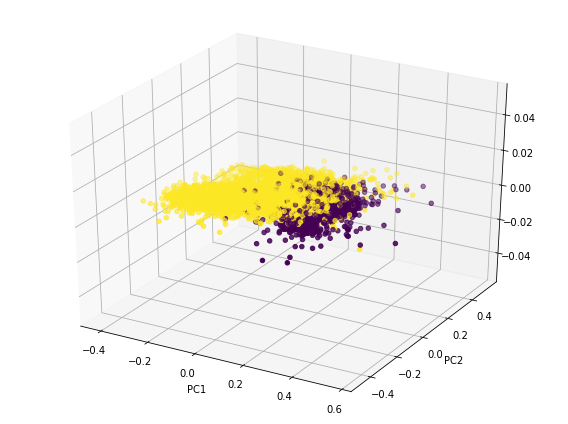

In [32]:
## plot the true class distribution

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'class_num')
# plt.savefig('true_cluster.png')
plt.show()

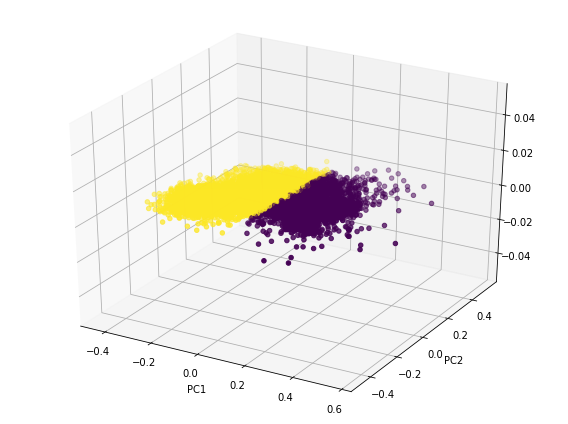

In [33]:
## plot the k-means cluster distribution

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'kmeans_clust')
# plt.savefig('kmeans_cluster.png')
plt.show()

In [34]:
classes = cluster_data['class'].unique()[0:2].tolist()
classes.remove(c1_KM)
kmeans_predict = np.where(data_clustered.loc[test_ind, 'kmeans_clust'] == 1, c1_KM, classes[0])

## 2. EM Algorithm

In [35]:
# EM Algorithm
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', n_init=30)
gmm.fit(noclass_cluster_data)

# Get the matrix of cluster membership probabilities:
# it's called z in the lecture notes
zMat = gmm.predict_proba(noclass_cluster_data)

In [36]:
data_clustered['GMix_clust'] = np.argmax(zMat, axis = 1)
data_clustered

,days_active,username_char_len,username_char,log_swears,log_polite,log_fourchan,office_hours_utc,office_hours_est,office_hours_pct,office_hours_mst,...,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio,class,kmeans_clust,class_num,GMix_clust
2,-1.381389,-0.248999,-0.248999,0.389027,-2.674186,-0.431054,-1.245703,-0.081035,0.981901,-0.551356,...,-0.148899,0.379464,-1.390639,-1.124515,-1.258265,0.216542,human,0,1.0,0
7,-1.378541,-0.248999,-0.248999,1.499108,0.364715,0.245145,1.021867,-0.734585,-1.361095,2.089745,...,1.398754,1.569849,0.546366,-0.851110,0.069840,0.229444,human,0,1.0,0
13,-1.371891,-0.248999,-0.248999,1.499108,-2.698746,-2.960740,3.041205,3.042609,-1.644093,-0.986429,...,4.745087,-0.913496,0.718739,2.188057,2.232605,0.329385,human,1,1.0,0
16,-1.366185,-0.634305,-0.634305,0.214812,0.101444,0.075755,-0.477169,-0.946877,-0.008017,-0.134397,...,-0.805396,1.596332,-0.295807,-0.971272,-0.932488,0.396320,human,0,1.0,0
20,-1.358569,-1.909454,-1.909454,1.499108,1.895704,-3.459571,-0.434565,-1.106950,-0.946344,0.428710,...,-1.681882,-2.300582,-2.569826,-1.337837,-1.514537,0.826950,human,0,1.0,0
22,-1.357616,-0.634305,-0.634305,-1.535529,1.895704,-2.218761,0.616777,1.528839,0.737483,0.248912,...,-1.970598,-2.186386,1.048802,-0.525658,-0.705634,0.992933,human,1,1.0,0
24,-1.355710,0.597529,0.597529,1.499108,0.215043,0.196124,0.085382,0.938879,0.401024,-0.297462,...,0.297191,1.015728,0.141527,0.466536,0.153317,0.804153,human,1,1.0,0
32,-1.344262,-0.993628,-0.993628,-1.535529,-0.705240,-0.211530,-0.978199,-0.796395,-0.219732,-0.652932,...,0.179012,1.820677,0.288247,0.058954,-0.203856,0.184184,human,1,1.0,0
33,-1.343307,1.542348,1.542348,1.499108,0.913105,1.258708,0.256375,-0.673287,-1.154679,0.885794,...,0.140055,-0.029428,0.656341,1.298756,0.977617,0.735640,human,1,1.0,0
34,-1.342352,0.597529,0.597529,-1.128751,-2.698746,-0.909813,-1.507468,-1.081105,0.314920,-0.955795,...,-1.718481,-1.701729,-1.224142,-0.465582,-0.653491,-0.397360,human,0,1.0,0


In [37]:
print(data_clustered.loc[data_clustered.GMix_clust == 1, 'class'].value_counts())
print(data_clustered.loc[data_clustered.GMix_clust == 0, 'class'].value_counts())

bot    4791
Name: class, dtype: int64
human    4801
bot       717
Name: class, dtype: int64


There is no definitive conclusion which cluster is bot or human. Clustering result is volatile. We choose the cluster with more bots than humans as bot cluster.

In [38]:
# decide which class is the cluster 1 -- which class has more records in cluster 1
c1_EM = data_clustered.loc[data_clustered.GMix_clust == 1, 'class'].value_counts().index[0]

In [39]:
# encode class = human/bot to class_num = 1/0, for instance
data_clustered['class_num'] = np.where(data_clustered['class'] == c1_EM, 1, 0)
data_clustered.class_num = np.where(data_clustered['class'].isna(), np.nan, data_clustered.class_num) # if class is NA, then class_num is NA
data_clustered

,days_active,username_char_len,username_char,log_swears,log_polite,log_fourchan,office_hours_utc,office_hours_est,office_hours_pct,office_hours_mst,...,log_padj_OT,log_padv_OT,log_Gun_Index,log_tot_hashtags,log_hash_PT,log_followers_friends_ratio,class,kmeans_clust,class_num,GMix_clust
2,-1.381389,-0.248999,-0.248999,0.389027,-2.674186,-0.431054,-1.245703,-0.081035,0.981901,-0.551356,...,-0.148899,0.379464,-1.390639,-1.124515,-1.258265,0.216542,human,0,0.0,0
7,-1.378541,-0.248999,-0.248999,1.499108,0.364715,0.245145,1.021867,-0.734585,-1.361095,2.089745,...,1.398754,1.569849,0.546366,-0.851110,0.069840,0.229444,human,0,0.0,0
13,-1.371891,-0.248999,-0.248999,1.499108,-2.698746,-2.960740,3.041205,3.042609,-1.644093,-0.986429,...,4.745087,-0.913496,0.718739,2.188057,2.232605,0.329385,human,1,0.0,0
16,-1.366185,-0.634305,-0.634305,0.214812,0.101444,0.075755,-0.477169,-0.946877,-0.008017,-0.134397,...,-0.805396,1.596332,-0.295807,-0.971272,-0.932488,0.396320,human,0,0.0,0
20,-1.358569,-1.909454,-1.909454,1.499108,1.895704,-3.459571,-0.434565,-1.106950,-0.946344,0.428710,...,-1.681882,-2.300582,-2.569826,-1.337837,-1.514537,0.826950,human,0,0.0,0
22,-1.357616,-0.634305,-0.634305,-1.535529,1.895704,-2.218761,0.616777,1.528839,0.737483,0.248912,...,-1.970598,-2.186386,1.048802,-0.525658,-0.705634,0.992933,human,1,0.0,0
24,-1.355710,0.597529,0.597529,1.499108,0.215043,0.196124,0.085382,0.938879,0.401024,-0.297462,...,0.297191,1.015728,0.141527,0.466536,0.153317,0.804153,human,1,0.0,0
32,-1.344262,-0.993628,-0.993628,-1.535529,-0.705240,-0.211530,-0.978199,-0.796395,-0.219732,-0.652932,...,0.179012,1.820677,0.288247,0.058954,-0.203856,0.184184,human,1,0.0,0
33,-1.343307,1.542348,1.542348,1.499108,0.913105,1.258708,0.256375,-0.673287,-1.154679,0.885794,...,0.140055,-0.029428,0.656341,1.298756,0.977617,0.735640,human,1,0.0,0
34,-1.342352,0.597529,0.597529,-1.128751,-2.698746,-0.909813,-1.507468,-1.081105,0.314920,-0.955795,...,-1.718481,-1.701729,-1.224142,-0.465582,-0.653491,-0.397360,human,0,0.0,0


In [40]:
# confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust))
print('\n')
print("=== Classification Report ===")
print(classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust))

=== Confusion Matrix ===
[[4801    0]
 [ 717 4791]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4801
           1       1.00      0.87      0.93      5508

    accuracy                           0.93     10309
   macro avg       0.94      0.93      0.93     10309
weighted avg       0.94      0.93      0.93     10309



In [41]:
# save the result
class_report = classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust, output_dict = True)

i = 1 if c1_EM == 'bot' else 0
pre_EM.append(class_report[str(i)]['precision'])
rec_EM.append(class_report[str(i)]['recall'])
f1_score_EM.append(class_report[str(i)]['f1-score'])
acc_EM.append(class_report['accuracy'])

Make a cluster distribution plot to see how well we separate bot and human against the true class distribution.

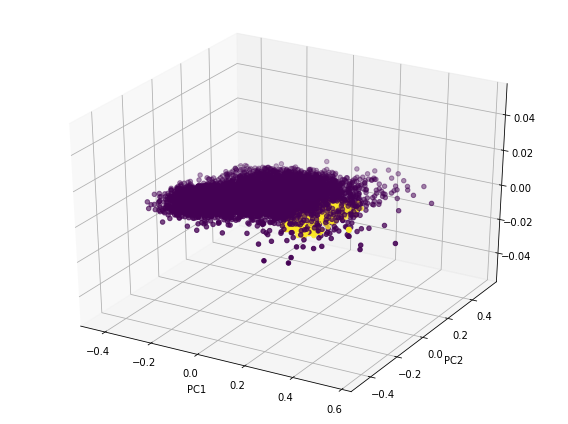

In [42]:
## plot the EM cluster distribution

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'GMix_clust')
# plt.savefig('GMix_clust.png')
plt.show()

In [43]:
classes = cluster_data['class'].unique()[0:2].tolist()
classes.remove(c1_EM)
EM_predict = np.where(data_clustered.loc[test_ind, 'GMix_clust'] == 1, c1_EM, classes[0])

Compare the performance of k-means and EM on outlier boundary $k$ sensitivity analysis. As it turns out EM outperforms k-means, thus EM will be the our choice of clustering method to do the model combination.

In [44]:
prediction = pd.DataFrame({'username': test_username, 'KM_predict': kmeans_predict, 'EM_predict': EM_predict})
prediction

,username,KM_predict,EM_predict
19772,AAlasti,human,human
19773,ABPolitical,human,human
19774,ACCCGreenDrJ,human,human
19775,ACIARAfrica,human,human
19776,ACSouthAsia,human,human
19777,AChonaing,human,human
19778,ACresswick,human,human
19780,ADBYNOT,human,human
19782,ADecroissance,human,human
19783,ADutchPatriot,human,human


In [45]:
print(prediction.KM_predict.value_counts())
print(prediction.EM_predict.value_counts())

human    3273
bot       145
Name: KM_predict, dtype: int64
human    3418
Name: EM_predict, dtype: int64


# Feature Importance Analysis
Run different categories of feature at a time to see how they affect the model performace.

In [46]:
# feature category
account_metadata = ['location', 'url', 'description', 'followers', 'friends', 'favourites_count', 'statuses_count', 'default_profile', 
                    'default_profile_image', 'date_created']

metadata_feature = ['days_active', 'username_int', 'username_char', 'username_char_len', 'username_other', 'username_int_end', 'name_int', 'name_ratio', 
                    'followers_age', 'following_age','favourites_age', 'tweets_age', 'lower_userid', 'followers_friends_ratio']

tweet_frequency = ['non_unique_tweets', 'average_tweets_day', 'average_minutes_between_tweets', 'average_hours_tweeted', 'office_hours_aus', 
                   'office_hours_est', 'office_hours_mst', 'office_hours_pct', 'office_hours_utc']

business_specific = ['username_urltitle_simimlarity', 'username_in_urltitle', 'username_name_similarity', 'username_in_bio', 'bio_sentiment_negative', 
                     'bio_sentiment_neutral', 'bio_sentiment_positive']

content_feature = list(set(cluster_data.columns).difference(set(account_metadata + metadata_feature + tweet_frequency + business_specific)))

removed_col = ['class', 'swear', 'polite', 'fourchan']
content_feature = [col for col in content_feature if col not in removed_col]

all_feature = account_metadata + metadata_feature + tweet_frequency + business_specific + content_feature

features = [account_metadata, metadata_feature, tweet_frequency, business_specific, content_feature, all_feature]

features_name = ['account_metadata', 'metadata_feature', 'tweet_frequency', 'business_specific',
            'content_feature', 'all_features']

features = pd.DataFrame({'Category': features_name, 'Features': features})
features

,Category,Features
0,account_metadata,"[location, url, description, followers, friend..."
1,metadata_feature,"[days_active, username_int, username_char, use..."
2,tweet_frequency,"[non_unique_tweets, average_tweets_day, averag..."
3,business_specific,"[username_urltitle_simimlarity, username_in_ur..."
4,content_feature,"[OGTratio, log_fourchan, swears, People_OT, al..."
5,all_features,"[location, url, description, followers, friend..."


## Data Cleaning

In [47]:
# drop columns with too many missing data
class_value = cluster_data['class']
cluster_data1 = cluster_data.drop('class', axis = 1).iloc[:,np.where(cluster_data.drop('class', axis = 1).count() > 0.7*(len(cluster_data)))[0]]
cluster_data1['class'] = class_value

In [48]:
## filter out only numeric columns
# drop object columns
cluster_data1 = cluster_data1.iloc[:, np.where(cluster_data1.dtypes != 'object')[0]]
cluster_data1['class'] = class_value

# drop boolean columns
bool_cols = [col for col in cluster_data1 
             if np.isin(cluster_data1[col].dropna().unique(), [0, 1]).all()]

cluster_data1 = cluster_data1.drop(bool_cols, axis = 1)

## Run Analysis

In [49]:
### parameters

# save the classification results
data_entries = []

pre_KM = []
pre_EM = []
rec_KM = []
rec_EM = []
f1_score_KM = []
f1_score_EM = []
acc_KM = []
acc_EM = []

# decide outlier
k = 20

In [50]:
## main
from io import StringIO

feature_path = path_to_files + 'Feature_Importance/'
if not os.path.exists(feature_path): os.mkdir(feature_path)

for i in range(len(features)):
    
    cluster_data_toclust = cluster_data1.loc[:,cluster_data1.columns.isin(features.Features[i])]
    cluster_data_toclust['class'] = class_value
    
    """# Data Preprocessing for Clustering
    
    Remove outliers and standardise the data. (Clustering methods are sensitive to outliers).
    """
    
    # implement log-transformation for us to see the pattern more clearly
    no_transform_col = ['alp_OT', 'char_OT', 'days_active', 'log_swears', 'log_polite', 'log_fourchan', 'name_int', 'nouns_OT', 'office_hours_aus', 
                                   'office_hours_est', 'office_hours_mst', 'office_hours_pct', 'office_hours_utc', 'ogtweets', 'ppron_OT', 'pron_OT', 
                                   'pStopW_OT', 'pverbs_OT', 'retweets', 'sent_OT', 'StopW_OT', 'TCW_OT', 'tot_tweets', 'TSW_OT', 
                                   'username_char', 'username_char_len', 'username_int', 'username_int_end', 'username_name_similarity', 'username_other',
                                   'verbs_OT', 'w/urlR_OT', 'words_OT', 'class']
    
    old_col = []
    add_col = []
    for col in cluster_data_toclust.drop(no_transform_col, axis = 1, errors='ignore').columns:
      
      old_col.append(col)
      new_col = 'log_' + col
      add_col.append(new_col)
      cluster_data_toclust[new_col] = np.log(cluster_data_toclust[col] + 0.00001)
    
    cluster_data_toclust = cluster_data_toclust.drop(old_col, axis = 1)
    
    # drop NA values
    cluster_data_toclust = cluster_data_toclust.loc[:,cluster_data_toclust.columns.isin(cluster_data_toclust.columns.tolist() + no_transform_col)]
    
    no_class_col = cluster_data_toclust.columns.tolist()
    no_class_col.remove('class')
    cluster_data_toclust = cluster_data_toclust.dropna(subset = no_class_col)
    
    # only keep the records without any outlier
    for col in cluster_data_toclust.drop(['class'], axis = 1).columns:
      Q1 = cluster_data_toclust[col].quantile(.25)
      Q3 = cluster_data_toclust[col].quantile(.75)
      IQR = Q3 - Q1
    
      cluster_data_toclust = cluster_data_toclust.loc[cluster_data_toclust[col].between(Q1-k*IQR, Q3+k*IQR)]
    
    data_entries.append(len(cluster_data_toclust))
    
    # transform data to normal-like distribution and do standardisation simultaneously
    cluster_data_toclust[cluster_data_toclust.drop(['class'], axis = 1).columns] = power_transform(cluster_data_toclust.drop(['class'], axis = 1), method='yeo-johnson')
    
    # drop meaningless columns (0 variance)
    meaningful_col = np.where(cluster_data_toclust.std(axis = 0) != 0)[0]
    meaningful_col = cluster_data_toclust.drop('class', axis = 1).iloc[:,meaningful_col].columns.tolist()
    meaningful_col.append('class')
    cluster_data_toclust = cluster_data_toclust[meaningful_col]
            
    # clustered user group
    test_ind = cluster_data_toclust[pd.isnull(cluster_data_toclust['class'])].index
    test_username = cluster_data.loc[test_ind, 'username']
    
    """# Bot/Human Clustering
    """
    
    # # drop 'class' to ready the model
    noclass_cluster_data = cluster_data_toclust.drop(['class'], axis = 1)
    noclass_cluster_data.head()
    
    data_clustered = copy.deepcopy(cluster_data_toclust)
    
    """## EM Algorithm"""
    
    gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', n_init=30)
    gmm.fit(noclass_cluster_data)
    
    # Get the matrix of cluster membership probabilities:
    # it's called z in the lecture notes
    zMat = gmm.predict_proba(noclass_cluster_data)
    
    data_clustered['GMix_clust'] = np.argmax(zMat, axis = 1)
      
    # decide which class is the cluster 1 -- which class has more records in cluster 1
    c1_EM = data_clustered.loc[data_clustered.GMix_clust == 1, 'class'].value_counts().index[0]
       
    # encode class = human/bot to class_num = 1/0
    data_clustered['class_num'] = np.where(data_clustered['class'] == c1_EM, 1, 0)
    data_clustered.class_num = np.where(data_clustered['class'].isna(), np.nan, data_clustered.class_num) # if class is NA, then class_num is NA
    
    # confusion matrix
    print("=== Confusion Matrix ===")
    print(confusion_matrix(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust))
    
    class_report = classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust, output_dict = True)
    
    j = 1 if c1_EM == 'bot' else 0
    pre_EM.append(class_report[str(j)]['precision'])
    rec_EM.append(class_report[str(j)]['recall'])
    f1_score_EM.append(class_report[str(j)]['f1-score'])
    acc_EM.append(class_report['accuracy'])
    
    # cluster model result with bot-predicted probability
    bot_class_num = np.where(c1_EM == 'bot', 1, 0)
    bot_prob = [zMat[i][bot_class_num] for i in range(len(zMat))]
    cluster_model_result = cluster_data.loc[data_clustered.index, ['id', 'username']]
    cluster_model_result['cluster_model_bot_prob'] = bot_prob
    
    feature_path1 = feature_path + features.Category[i] + '/'
    if not os.path.exists(feature_path1): os.mkdir(feature_path1)
    cluster_model_result.to_csv(feature_path1 + features.Category[i] + '_cluster_result.csv')


=== Confusion Matrix ===
[[ 8229   891]
 [   53 10532]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      9120
           1       0.92      0.99      0.96     10585

    accuracy                           0.95     19705
   macro avg       0.96      0.95      0.95     19705
weighted avg       0.96      0.95      0.95     19705

=== Confusion Matrix ===
[[5463 1801]
 [   2 6264]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      7264
           1       0.78      1.00      0.87      6266

    accuracy                           0.87     13530
   macro avg       0.89      0.88      0.87     13530
weighted avg       0.90      0.87      0.87     13530

=== Confusion Matrix ===
[[6458  603]
 [1924 6653]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.91  

In [51]:
# save the result
results = pd.DataFrame({'Features': features.Category, 'pre_EM': pre_EM, 'rec_EM': rec_EM, 'f1_EM': f1_score_EM, 'acc_EM': acc_EM, 'Entries': data_entries})
results.to_csv(feature_path + 'EM_results.csv')
results

,Features,pre_EM,rec_EM,f1_EM,acc_EM,Entries
0,account_metadata,0.993601,0.902303,0.945753,0.952093,26539
1,metadata_feature,0.999634,0.752065,0.858355,0.866741,17754
2,tweet_frequency,0.770461,0.914601,0.836366,0.838406,21178
3,business_specific,0.695474,0.522368,0.596619,0.673078,26539
4,content_feature,0.505252,0.661686,0.572984,0.538201,24812
5,all_features,1.000000,0.874365,0.932972,0.932874,13727


# Data Preprocessing for Classification

Convert non-numerical variables.

In [52]:
classifier_train = train
classifier_test = test

In [53]:
def word_convert(df):
    bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                        r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                        r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                        r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

    df['name_binary'] = df.name.str.contains(bag_of_words_bot, case=False, na=False)*1
    df['username_binary'] = df.username.str.contains(bag_of_words_bot, case=False, na=False)*1
    df['description_binary'] = df.description.str.contains(bag_of_words_bot, case=False, na=False)*1
    
    return df


def diversity(df):   
    df.loc[:,'desc_length'] = df.description.apply(lambda text: len(str(text)))
    df.loc[:,'null_url'] = df.url.apply(lambda x: 1 if (str(x).find('http'))!=-1 else 0)
    return df


def drop_features(df):
    return df.drop(['id','name', 'username','location','url', 'description',
                    'date_created','swears','polite','fourchan'], axis=1)

def replace_None(df):
    #df.loc[:,'desc_length'].fillna("")
    df.loc[:,'default_profile'] = df['default_profile'].apply(lambda x: 1 if x else 0)
    df.loc[:,'default_profile_image'] = df['default_profile_image'].apply(lambda x: 1 if x else 0)
    df['followers_friends_ratio'] = df['followers_friends_ratio'].replace(np.nan,0)
    df.loc[:,'username_urltitle_simimlarity'] = df['username_urltitle_simimlarity'].apply(lambda x: 1 if x else 0)
    df.loc[:,'username_in_urltitle'] = df['username_in_urltitle'].apply(lambda x: 1 if x else 0)
    return df

def modify_class(df):
    class_col = df['class']
    class_col = pd.get_dummies(class_col, drop_first=True)
    col_list = df.columns.tolist()
    col_list.remove('class')
    df = df[col_list]
    df['class'] = class_col
    return df

def transform_features(df): 
    df = word_convert(df)
    df = replace_None(df)  
    df = diversity(df)
    df = drop_features(df)
    return df

In [54]:
train_data = transform_features(classifier_train)
train_data = train_data.dropna()
train_data = modify_class(train_data)

print(train_data.info())

#train_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19699 entries, 0 to 19704
Data columns (total 79 columns):
followers                         19699 non-null int64
friends                           19699 non-null int64
favourites_count                  19699 non-null int64
statuses_count                    19699 non-null int64
default_profile                   19699 non-null int64
default_profile_image             19699 non-null int64
days_active                       19699 non-null int64
followers_age                     19699 non-null float64
following_age                     19699 non-null float64
favourites_age                    19699 non-null float64
tweets_age                        19699 non-null float64
username_char_len                 19699 non-null int64
name_ratio                        19699 non-null float64
username_int                      19699 non-null int64
username_char                     19699 non-null int64
username_other                    19699 non-null int64
u

In [55]:
print(train_data['class'].value_counts())
bot_ratio1 = round(train_data['class'].value_counts()[0]/sum(train_data['class'].value_counts()), 2)
human_ratio1 = round(train_data['class'].value_counts()[1]/sum(train_data['class'].value_counts()), 2)
print('bot : human = ',bot_ratio1,':',human_ratio1)

1    10579
0     9120
Name: class, dtype: int64
bot : human =  0.46 : 0.54


In [56]:
train_index = train_data['class'].index
train_id = classifier_train.loc[train_index, 'id']
train_username = classifier_train.loc[train_index, 'username']

In [57]:
test_data = classifier_test.drop(['class'],axis = 1)
test_data = word_convert(test_data)
test_data = diversity(test_data)
test_data = drop_features(test_data)
test_data['class'] = np.nan
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 79 columns):
followers                         6834 non-null int64
friends                           6834 non-null int64
favourites_count                  6834 non-null int64
statuses_count                    6834 non-null int64
default_profile                   6834 non-null int64
default_profile_image             6834 non-null int64
days_active                       6834 non-null int64
followers_age                     6834 non-null float64
following_age                     6834 non-null float64
favourites_age                    6834 non-null float64
tweets_age                        6834 non-null float64
username_char_len                 6834 non-null int64
name_ratio                        6834 non-null float64
username_int                      6834 non-null int64
username_char                     6834 non-null int64
username_other                    6834 non-null int64
username_int_end   

In [58]:
test_index = test_data['class'].index
test_id = classifier_test.loc[test_index, 'id']
test_username = test.loc[test_index, 'username']

In [59]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
X_test.sample(5)

,followers,friends,favourites_count,statuses_count,default_profile,default_profile_image,days_active,followers_age,following_age,favourites_age,...,lower_userid,followers_friends_ratio,bio_sentiment_negative,bio_sentiment_neutral,bio_sentiment_positive,name_binary,username_binary,description_binary,desc_length,null_url
2652,1441,292,411,1508,0,0,3400,0.423824,0.085882,0.120882,...,1,4.934932,0,0,1,0,0,0,49,1
4204,18,62,97,1303,1,0,1824,0.009868,0.033991,0.053180,...,0,0.290323,0,1,0,0,0,0,3,0
4067,9,36,9,10,1,0,31,0.290323,1.161290,0.290323,...,0,0.250000,1,0,0,0,0,0,38,0
6238,653,761,2474,2001,0,0,1782,0.366442,0.427048,1.388328,...,0,0.858081,0,1,0,0,0,0,35,0
1986,45,60,12596,1364,1,1,2363,0.019044,0.025391,5.330512,...,0,0.750000,0,1,0,0,0,0,3,0


## Feature selection
based on importance criterion

Feature ranking:
1. feature 5: default_profile_image (0.232670)
2. feature 33: OGTratio (0.104635)
3. feature 31: retweets (0.091793)
4. feature 4: default_profile (0.070474)
5. feature 30: tot_tweets (0.063080)
6. feature 36: w/urlR_OT (0.033597)
7. feature 77: null_url (0.030329)
8. feature 65: username_in_urltitle (0.023952)
9. feature 66: username_name_similarity (0.020377)
10. feature 23: log_polite (0.018425)
11. feature 68: lower_userid (0.018211)
12. feature 32: ogtweets (0.017955)
13. feature 35: ment_OT (0.015680)
14. feature 6: days_active (0.014442)
15. feature 21: average_hours_tweeted (0.012717)
16. feature 2: favourites_count (0.010484)
17. feature 62: tot_hashtags (0.009635)
18. feature 9: favourites_age (0.009224)
19. feature 71: bio_sentiment_neutral (0.007947)
20. feature 3: statuses_count (0.007563)
21. feature 76: desc_length (0.007494)
22. feature 10: tweets_age (0.007290)
23. feature 38: words_OT (0.007105)
24. feature 39: alp_OT (0.007030)
25. feature 24: log_fo

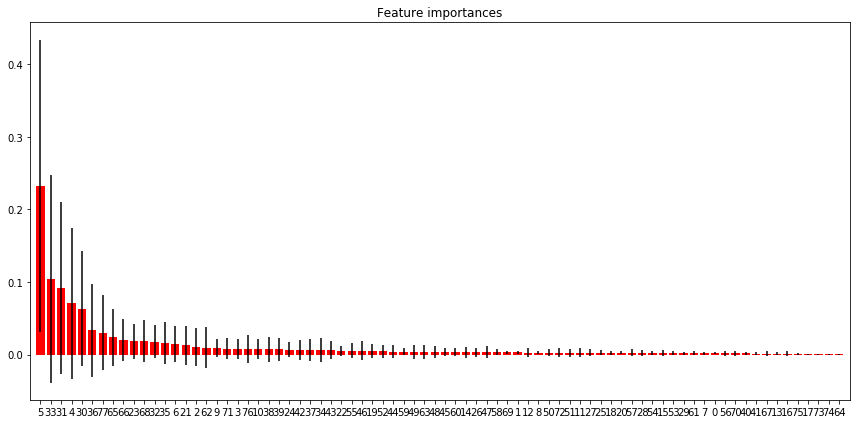

In [60]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
final_features = []

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    current_feature = X.columns.values[indices[f]]
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], current_feature, importances[indices[f]]))
    if importances[indices[f]] >= 0.0018:
        final_features.append(current_feature)
        

# Plot the feature importances of the forest
fig = plt.figure(figsize = (12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [61]:
final_features.append('class')
new_train_data = train_data[final_features]
new_train_data.sample(5)

,default_profile_image,OGTratio,retweets,default_profile,tot_tweets,w/urlR_OT,null_url,username_in_urltitle,username_name_similarity,log_polite,...,average_minutes_between_tweets,padj_OT,office_hours_mst,pHW_OT,username_other,ORGs_OT,office_hours_aus,Gun_Index,followers_age,class
222,0,18.072289,136,1,166,16.666667,0,1,0.000000,0.000000,...,2926,0.000000,0.554,0.000000,1,0.600000,0.608,0.000000,0.920590,1
6181,1,100.000000,0,1,23,0.000000,0,1,0.571429,0.000000,...,4226,8.056872,0.522,8.530806,0,0.304348,0.217,4.004915,0.003801,0
7223,1,100.000000,0,1,19,5.263158,0,1,0.947368,-2.251292,...,6954,5.741627,0.368,6.698565,0,0.736842,0.474,3.269902,0.002266,0
13776,1,90.909091,1,1,11,0.000000,0,1,0.111111,0.000000,...,67257,0.000000,0.000,0.000000,0,0.100000,0.182,0.000000,0.001717,0
3195,1,100.000000,0,1,110,0.000000,0,1,0.965517,-2.908721,...,1648,5.475990,0.100,6.065712,0,0.036364,0.418,3.037485,0.001774,0


In [62]:
X_train = new_train_data.iloc[:,:-1]
y_train = new_train_data.iloc[:,-1]
X_final_test = test_data[final_features].iloc[:,:-1]
#print(X_train.mean())


In [63]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
imputed_train_df = imp_mean.transform(X_train)
imputed_train_df = pd.DataFrame(data=imputed_train_df[:], columns = X_train.columns.values)
print(imputed_train_df)

       default_profile_image   OGTratio  retweets  default_profile  \
0                        0.0  30.456853     137.0              0.0   
1                        0.0  45.500000     109.0              1.0   
2                        0.0  35.204082     127.0              1.0   
3                        0.0   9.947644     172.0              1.0   
4                        0.0  68.877551      61.0              0.0   
5                        0.0  88.500000      23.0              1.0   
6                        0.0  53.500000      93.0              1.0   
7                        0.0  28.571429      15.0              1.0   
8                        0.0  80.000000      40.0              0.0   
9                        0.0  33.093525      93.0              0.0   
10                       0.0   0.000000       1.0              1.0   
11                       0.0  56.060606      87.0              1.0   
12                       0.0  62.000000      76.0              0.0   
13                  

In [64]:
X_final_test = X_final_test.fillna(imputed_train_df)

#X_test[0:5]

np.where(np.isnan(X_final_test))

(array([], dtype=int64), array([], dtype=int64))

## Decision tree 
 

In [65]:
feature_path_dt = feature_path + 'Classification/'
if not os.path.exists(feature_path_dt): os.mkdir(feature_path_dt)

def run_dt(X_train,y_train,X_test):
    dt = DecisionTreeClassifier()

    parameters = {'criterion': ['entropy', 'gini'],
                  'max_depth': [3, 5, 6, 8, 10], 
                  'min_samples_split': [10, 20, 30],
                  'min_samples_leaf': [1,5,8],
                  'min_impurity_split': [0.00000001, 0.0000001]
                 }

    acc_scorer = make_scorer(accuracy_score)

    #grid search
    grid_dtc = GridSearchCV(dt, parameters, scoring=acc_scorer, cv =10)
    grid_dtc = grid_dtc.fit(X_train, y_train)

    # Set the dtc to the best combination of parameters
    dt = grid_dtc.best_estimator_

    dt.fit(X_train, y_train)
    
    dt_pred_train = cross_val_predict(dt,X_train, y_train,cv=10)
    dt_pred_test = dt.predict(X_test)
    dt_train_proba = dt.predict_proba(X_train)
    dt_test_proba = dt.predict_proba(X_test)
    
    print("Trainig Accuracy: %.5f" %accuracy_score(y_train, dt_pred_train))
    print(classification_report(y_train, dt_pred_train))
    print("confusion matrix is:")
    print(confusion_matrix(y_train, dt_pred_train))
    
    return dt,dt_pred_train,dt_pred_test,dt_train_proba,dt_test_proba

def bot_human_ratio(origin_df,prediction_df):
    bot_ratio1 = round(origin_df['class'].value_counts()[0]/sum(origin_df['class'].value_counts()), 2)
    human_ratio1 = round(origin_df['class'].value_counts()[1]/sum(origin_df['class'].value_counts()), 2)
    
    bot_ratio2 = round(prediction_df.predict_train.value_counts()[0]/sum(prediction_df.predict_train.value_counts()), 2)
    human_ratio2 = round(prediction_df.predict_train.value_counts()[1]/sum(prediction_df.predict_train.value_counts()), 2)
    
    return bot_ratio1,human_ratio1,bot_ratio2,human_ratio2

In [66]:
dt_all,dt_pred_train_all,dt_pred_test_all,dt_train_proba_all,dt_test_proba_all = run_dt(X_train,y_train,X_final_test)

prediction_all = pd.DataFrame({'id': train_id,'username': train_username, 
                               'origin': y_train, 'dt_predict_train_all': dt_pred_train_all,
                               'Bot_proba': dt_train_proba_all[:, 0], 'Human_proba': dt_train_proba_all[:, 1]})

prediction_all.to_csv(feature_path_dt + 'all_features_train_result.csv', index = False)

Trainig Accuracy: 0.98619
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9120
           1       0.98      0.99      0.99     10579

    accuracy                           0.99     19699
   macro avg       0.99      0.99      0.99     19699
weighted avg       0.99      0.99      0.99     19699

confusion matrix is:
[[ 8943   177]
 [   95 10484]]


In [67]:
prediction_all_test = pd.DataFrame({'id': test_id,'username': test_username, 
                                   'dt_predict_test_all': dt_pred_test_all,
                                   'Bot_proba': dt_test_proba_all[:, 0], 'Human_proba': dt_test_proba_all[:, 1]})

prediction_all_test.to_csv(feature_path_dt + 'all_features_test_result.csv', index = False)

#origin_bot,origin_human,pre_bot,pre_human = bot_human_ratio(X_train,prediction_all)


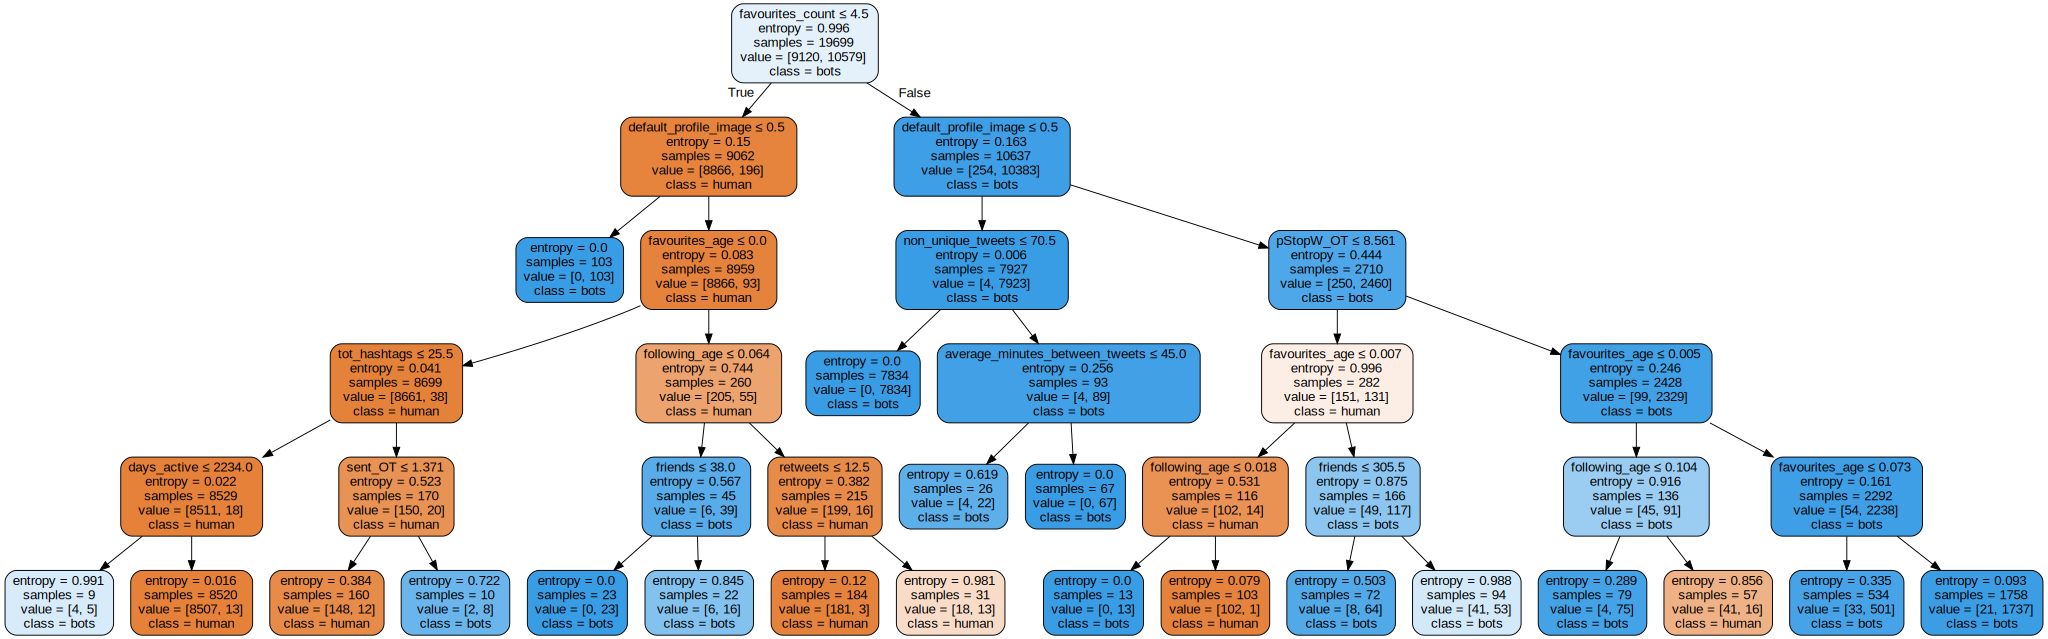

In [68]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt_all, out_file=None, 
                     feature_names=X_train.columns.values,  
                     class_names=['human','bots'],  
                     filled=True, rounded=True,  
                     special_characters=True)   
graph = graphviz.Source(dot_data) 
graph.render("Decision Tree-Climate")
graph

# Feature Importance Analysis
Run different categories of feature at a time to see how they affect the model performace.

In [69]:
# specify catagory
def account_metadata(df):
    am = ['id', 'name', 'username', 'location', 'url', 'description', 'followers',
           'friends', 'favourites_count', 'statuses_count', 'default_profile',
           'default_profile_image', 'date_created','class']
    df = df[am]
    
    #word_convert
    bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                        r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                        r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                        r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

    df['name_binary'] = df.name.str.contains(bag_of_words_bot, case=False, na=False)*1
    df['username_binary'] = df.username.str.contains(bag_of_words_bot, case=False, na=False)*1
    df['description_binary'] = df.description.str.contains(bag_of_words_bot, case=False, na=False)*1
    
    #diversity
    df.loc[:,'desc_length'] = df.description.apply(lambda text: len(str(text)))
    df.loc[:,'null_url'] = df.url.apply(lambda x: 1 if (str(x).find('http'))!=-1 else 0)
    
    #clean
    df.loc[:,'default_profile'] = df['default_profile'].apply(lambda x: 1 if x else 0)
    df.loc[:,'default_profile_image'] = df['default_profile_image'].apply(lambda x: 1 if x else 0)
    
    #change class order
    class_col = df['class']
    col_list = df.columns.tolist()
    col_list.remove('class')
    df = df[col_list]
    df['class'] = class_col
    
    return df.drop(['id','name', 'username','location','url', 'description',
                    'date_created'], axis=1)

def metadata_features(df):
    mf = ['days_active','followers_age', 'following_age', 'favourites_age', 'tweets_age',
           'username_char_len', 'name_ratio', 'username_int', 'username_char',
           'username_other', 'username_int_end', 'name_int', 'lower_userid',
           'followers_friends_ratio','class']
    df = df[mf]
    
    df['followers_friends_ratio'] = df['followers_friends_ratio'].replace(np.nan,0)

    return df

def tweet_frequency(df):
    tf = ['non_unique_tweets','average_tweets_day', 'average_minutes_between_tweets',
           'average_hours_tweeted', 'office_hours_utc', 'office_hours_est',
           'office_hours_pct', 'office_hours_mst', 'office_hours_aus','class']
    
    df = df[tf]
    return df

def content_analysis(df):
    ca = ['log_swears','log_polite', 'log_fourchan','tot_tweets', 'retweets', 
          'ogtweets', 'OGTratio', 'char_OT', 'ment_OT','w/urlR_OT', 'sent_OT', 
          'words_OT', 'alp_OT', 'cap_OT', 'capR_OT','TCW_OT', 'TSW_OT', 'nHW_OT',
          'StopW_OT', 'nouns_OT', 'adj_OT','verbs_OT', 'adv_OT', 'pron_OT', 'Tot_entities_OT', 'People_OT',
          'ORGs_OT', 'pHW_OT', 'pStopW_OT', 'pnouns_OT', 'padj_OT', 'pverbs_OT',
          'padv_OT', 'ppron_OT', 'Gun_Index', 'tot_hashtags', 'hash_PT','class']
    
    # implement log-transformation for us to see the pattern more clearly
    #new_df = df[ca].dropna()
    #new_df['class'] = df['class']
    df = df[ca]
    
    return df

def business_specific(df):
    bs = ['username_urltitle_simimlarity', 'username_in_urltitle',
           'username_name_similarity', 'username_in_bio', 'bio_sentiment_negative',
           'bio_sentiment_neutral', 'bio_sentiment_positive','class']
    df = df[bs]
    
    df.loc[:,'username_urltitle_simimlarity'] = df['username_urltitle_simimlarity'].apply(lambda x: 1 if x else 0)
    df.loc[:,'username_in_urltitle'] = df['username_in_urltitle'].apply(lambda x: 1 if x else 0)
    
    return df


In [70]:
# 1.account metadata
train_am = account_metadata(train)
train_am['class'] = pd.get_dummies(train_am['class'], drop_first=True)
print(train_am.info())

train_am_index = train_am['class'].index
train_am_id = train.loc[train_am_index, 'id']
train_am_username = train.loc[train_am_index, 'username']

#print(train_am.info())

test_am = account_metadata(test)
print(test_am.info())

test_am_index = test_am['class'].index
test_am_id = test.loc[test_am_index, 'id']
test_am_username = test.loc[test_am_index, 'username']

#print(test_am.info())
X_am = train_am.iloc[:,:-1]
y_am = train_am.iloc[:,-1]
X_test_am = test_am.iloc[:,:-1]
X_test_am = X_test_am.fillna(X_am.mean())

#X_am[0:5]

dt_am,am_pred_train,am_pred_test,am_train_proba,am_test_proba = run_dt(X_am,y_am,X_test_am)


#training dataset result
prediction_train_am = pd.DataFrame({'id': train_am_id,'username': train_am_username, 
                                   'origin': y_am, 'predict_train': am_pred_train,
                                    'Bot_proba': am_train_proba[:, 0], 'Human_proba': am_train_proba[:, 1]})
prediction_train_am.to_csv(feature_path_dt + 'account_metadata_train_results.csv', index = False)

am_origin_bot,am_origin_human,am_pre_bot,am_pre_human = bot_human_ratio(train_am,prediction_train_am)

#test dataset result
prediction_test_am = pd.DataFrame({'id': test_am_id,'username': test_am_username, 
                           'predict_test': am_pred_test,
                           'Bot_proba': am_test_proba[:, 0], 'Human_proba': am_test_proba[:, 1]})
prediction_test_am.to_csv(feature_path_dt + 'account_metadata_test_results.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 12 columns):
followers                19705 non-null int64
friends                  19705 non-null int64
favourites_count         19705 non-null int64
statuses_count           19705 non-null int64
default_profile          19705 non-null int64
default_profile_image    19705 non-null int64
name_binary              19705 non-null int64
username_binary          19705 non-null int64
description_binary       19705 non-null int64
desc_length              19705 non-null int64
null_url                 19705 non-null int64
class                    19705 non-null uint8
dtypes: int64(11), uint8(1)
memory usage: 1.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 12 columns):
followers                6834 non-null int64
friends                  6834 non-null int64
favourites_count         6834 non-null int64
statuses_count           6834 non-null int6

In [71]:
#2. metadata features
train_mf = metadata_features(train)
train_mf['class'] = pd.get_dummies(train_mf['class'], drop_first=True)
train_mf = train_mf.dropna()
print(train_mf.info())

train_mf_index = train_mf['class'].index
train_mf_id = train.loc[train_mf_index, 'id']
train_mf_username = train.loc[train_mf_index, 'username']

test_mf = metadata_features(test)
print(test_mf.info())

test_mf_index = test_mf['class'].index
test_mf_id = test.loc[test_mf_index, 'id']
test_mf_username = test.loc[test_mf_index, 'username']

#print(test_mf.info())

X_mf = train_mf.iloc[:,:-1]
y_mf = train_mf.iloc[:,-1]
X_test_mf = test_mf.iloc[:,:-1]
X_test_mf = X_test_mf.fillna(X_mf.mean())

#X_mf[0:5]

dt_mf,mf_pred_train,mf_pred_test,mf_train_proba,mf_test_proba = run_dt(X_mf,y_mf,X_test_mf)


#training dataset result
prediction_train_mf = pd.DataFrame({'id': train_mf_id,'username': train_mf_username, 
                           'origin': y_mf, 'predict_train': mf_pred_train,
                           'Bot_proba': mf_train_proba[:, 0], 'Human_proba': mf_train_proba[:, 1]})
prediction_train_mf.to_csv(feature_path_dt + 'metadata_features_train_result.csv', index = False)

mf_origin_bot,mf_origin_human,mf_pre_bot,mf_pre_human = bot_human_ratio(train_mf,prediction_train_mf)

#test dataset result
prediction_test_mf = pd.DataFrame({'id': test_mf_id,'username': test_mf_username, 
                           'predict_test': mf_pred_test,
                           'Bot_proba': mf_test_proba[:, 0], 'Human_proba': mf_test_proba[:, 1]})
prediction_test_mf.to_csv(feature_path_dt + 'metadata_features_test_result.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19703 entries, 0 to 19704
Data columns (total 15 columns):
days_active                19703 non-null int64
followers_age              19703 non-null float64
following_age              19703 non-null float64
favourites_age             19703 non-null float64
tweets_age                 19703 non-null float64
username_char_len          19703 non-null int64
name_ratio                 19703 non-null float64
username_int               19703 non-null int64
username_char              19703 non-null int64
username_other             19703 non-null int64
username_int_end           19703 non-null int64
name_int                   19703 non-null float64
lower_userid               19703 non-null int64
followers_friends_ratio    19703 non-null float64
class                      19703 non-null uint8
dtypes: float64(7), int64(7), uint8(1)
memory usage: 2.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (tota

In [72]:
#3. tweet frequency
train_tf = tweet_frequency(train)
train_tf['class'] = pd.get_dummies(train_tf['class'], drop_first=True)
print(train_tf.info())

train_tf_index = train_tf['class'].index
train_tf_id = train.loc[train_tf_index, 'id']
train_tf_username = train.loc[train_tf_index, 'username']

test_tf = tweet_frequency(test)
#test_tf = test_tf.dropna(subset=['average_minutes_between_tweets'])
print(test_tf.info())

test_tf_index = test_tf['class'].index
test_tf_id = test.loc[test_tf_index, 'id']
test_tf_username = test.loc[test_tf_index, 'username']

#print(test_tf.info())

X_tf = train_tf.iloc[:,:-1]
y_tf = train_tf.iloc[:,-1]
X_test_tf = test_tf.iloc[:,:-1]
X_test_tf = X_test_tf.fillna(X_tf.mean())

#X_tf[0:5]
#y_tf

dt_tf,tf_pred_train,tf_pred_test,tf_train_proba,tf_test_proba = run_dt(X_tf,y_tf,X_test_tf)


#training dataset result
prediction_train_tf = pd.DataFrame({'id': train_tf_id,'username': train_tf_username, 
                           'origin': y_tf, 'predict_train': tf_pred_train,
                           'Bot_proba': tf_train_proba[:, 0], 'Human_proba': tf_train_proba[:, 1]})
prediction_train_tf.to_csv(feature_path_dt + 'tweet_frequency_train_result.csv', index = False)

tf_origin_bot,tf_origin_human,tf_pre_bot,tf_pre_human = bot_human_ratio(train_tf,prediction_train_tf)

#test dataset result
prediction_test_tf = pd.DataFrame({'id': test_tf_id,'username': test_tf_username, 
                           'predict_test': tf_pred_test,
                           'Bot_proba': tf_test_proba[:, 0], 'Human_proba': tf_test_proba[:, 1]})
prediction_test_tf.to_csv(feature_path_dt + 'tweet_frequency_test_result.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 10 columns):
non_unique_tweets                 19705 non-null int64
average_tweets_day                19705 non-null int64
average_minutes_between_tweets    19705 non-null int64
average_hours_tweeted             19705 non-null int64
office_hours_utc                  19705 non-null float64
office_hours_est                  19705 non-null float64
office_hours_pct                  19705 non-null float64
office_hours_mst                  19705 non-null float64
office_hours_aus                  19705 non-null float64
class                             19705 non-null uint8
dtypes: float64(5), int64(4), uint8(1)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 10 columns):
non_unique_tweets                 6831 non-null float64
average_tweets_day                6831 non-null float64
average_minutes_between_tweets    6827 non-null

In [73]:
#4. content analysis
print(train.info())
train_ca = content_analysis(train)
train_ca['class'] = pd.get_dummies(train_ca['class'], drop_first=True)
train_ca = train_ca.dropna()
print(train_ca.info())

train_ca_index = train_ca['class'].index
train_ca_id = train.loc[train_ca_index, 'id']
train_ca_username = train.loc[train_ca_index, 'username']


test_ca = content_analysis(test)
print(test_ca.info())

test_ca_index = test_ca['class'].index
test_ca_id = test.loc[test_ca_index, 'id']
test_ca_username = test.loc[test_ca_index, 'username']
#print(test_ca.info())

X_ca = train_ca.iloc[:,:-1]
y_ca = train_ca.iloc[:,-1]
X_test_ca = test_ca.iloc[:,:-1]
X_test_ca = X_test_ca.fillna(X_ca.mean())

#X_ca[0:5]

dt_ca,ca_pred_train,ca_pred_test,ca_train_proba,ca_test_proba = run_dt(X_ca,y_ca,X_test_ca)


#training dataset result
prediction_train_ca = pd.DataFrame({'id': train_ca_id,'username': train_ca_username, 
                           'origin': y_ca, 'predict_train': ca_pred_train,
                           'Bot_proba': ca_train_proba[:, 0], 'Human_proba': ca_train_proba[:, 1]})
prediction_train_ca.to_csv(feature_path_dt + 'content_analysis_train_result.csv', index = False)

ca_origin_bot,ca_origin_human,ca_pre_bot,ca_pre_human = bot_human_ratio(train_ca,prediction_train_ca)

#test dataset result
prediction_test_ca = pd.DataFrame({'id': test_ca_id,'username': test_ca_username, 
                           'predict_test': ca_pred_test,
                           'Bot_proba': ca_test_proba[:, 0], 'Human_proba': ca_test_proba[:, 1]})
prediction_test_ca.to_csv(feature_path_dt + 'content_analysis_test_result.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 89 columns):
id                                19705 non-null int64
name                              19703 non-null object
username                          19705 non-null object
location                          11580 non-null object
url                               5672 non-null object
description                       12928 non-null object
followers                         19705 non-null int64
friends                           19705 non-null int64
favourites_count                  19705 non-null int64
statuses_count                    19705 non-null int64
default_profile                   19705 non-null int64
default_profile_image             19705 non-null int64
class                             19705 non-null object
date_created                      19705 non-null object
days_active                       19705 non-null int64
followers_age                     19705 non-null float64
fol

Trainig Accuracy: 0.95802
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      9120
           1       0.95      0.97      0.96     10581

    accuracy                           0.96     19701
   macro avg       0.96      0.96      0.96     19701
weighted avg       0.96      0.96      0.96     19701

confusion matrix is:
[[ 8603   517]
 [  310 10271]]


In [74]:
# 5.business specific
train_bs = business_specific(train)
train_bs['class'] = pd.get_dummies(train_bs['class'], drop_first=True)
print(train_bs.info())

train_bs_index = train_bs['class'].index
train_bs_id = train.loc[train_bs_index, 'id']
train_bs_username = train.loc[train_bs_index, 'username']


test_bs = business_specific(test)
print(test_bs.info())

test_bs_index = test_bs['class'].index
test_bs_id = test.loc[test_bs_index, 'id']
test_bs_username = test.loc[test_bs_index, 'username']

#print(test_bs.info())

X_bs = train_bs.iloc[:,:-1]
y_bs = train_bs.iloc[:,-1]
X_test_bs = test_bs.iloc[:,:-1]
X_test_bs = X_test_bs.fillna(X_bs.mean())

#X_bs[0:5]

dt_bs,bs_pred_train,bs_pred_test,bs_train_proba,bs_test_proba = run_dt(X_bs,y_bs,X_test_bs)


#training dataset result
prediction_train_bs = pd.DataFrame({'id': train_bs_id,'username': train_bs_username, 
                           'origin': y_bs, 'predict_train': bs_pred_train,
                           'Bot_proba': bs_train_proba[:, 0], 'Human_proba': bs_train_proba[:, 1]})
prediction_train_bs.to_csv(feature_path_dt + 'business_specific_train_result.csv', index = False)

bs_origin_bot,bs_origin_human,bs_pre_bot,bs_pre_human = bot_human_ratio(train_bs,prediction_train_bs)

#test dataset result
prediction_test_bs = pd.DataFrame({'id': test_bs_id,'username': test_bs_username, 
                           'predict_test': bs_pred_test,
                           'Bot_proba': bs_test_proba[:, 0], 'Human_proba': bs_test_proba[:, 1]})
prediction_test_bs.to_csv(feature_path_dt + 'business_specific_test_result.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 8 columns):
username_urltitle_simimlarity    19705 non-null int64
username_in_urltitle             19705 non-null int64
username_name_similarity         19705 non-null float64
username_in_bio                  19705 non-null int64
bio_sentiment_negative           19705 non-null int64
bio_sentiment_neutral            19705 non-null int64
bio_sentiment_positive           19705 non-null int64
class                            19705 non-null uint8
dtypes: float64(1), int64(6), uint8(1)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 8 columns):
username_urltitle_simimlarity    6834 non-null int64
username_in_urltitle             6834 non-null int64
username_name_similarity         6834 non-null float64
username_in_bio                  6834 non-null int64
bio_sentiment_negative           6834 non-null int64
bio_sentiment_neutra

In [75]:
print('All features')
print('predict bot:human :',am_origin_bot,':',am_origin_human)

print('1. account metadata')
print('predict bot:human :',am_pre_bot,':',am_pre_human)

print('2. metadata features')
print('predict bot:human :',mf_pre_bot,':',mf_pre_human)

print('3. tweet frequency')
print('predict bot:human :',tf_pre_bot,':',tf_pre_human)

print('4.content analysis')
print('predict bot:human :',ca_pre_bot,':',ca_pre_human)

print('5.business specific')
print('predict bot:human :',bs_pre_bot,':',bs_pre_human)


All features
predict bot:human : 0.46 : 0.54
1. account metadata
predict bot:human : 0.46 : 0.54
2. metadata features
predict bot:human : 0.46 : 0.54
3. tweet frequency
predict bot:human : 0.43 : 0.57
4.content analysis
predict bot:human : 0.45 : 0.55
5.business specific
predict bot:human : 0.53 : 0.47


# Weighted Addition Model (WAM)

In [76]:
## Weighted Addition Model (WAM) on data with all features
features_name = ['account_metadata', 'metadata_feature', 'tweet_frequency', 'business_specific', 'content_feature', 'all_features']

cluster_entry = []
class_entry = []

# model parameters
alpha = 0.5
threshold = 0.5 # class threshold
    
# result parameters
pre_WAM = []
rec_WAM = []
f1_score_WAM = []
acc_WAM = []

# file path
wam_path = feature_path + 'all_features/'

# cluster model result with bot-predicted probability
cluster_model_result = pd.read_csv(glob.glob(wam_path + '*_cluster_result.csv')[0])
cluster_model_result = cluster_model_result.iloc[:,1:] # drop extra index column
cluster_model_train_result = cluster_model_result.merge(train[['id', 'username']])
cluster_entry.append(len(cluster_model_train_result))
    
# classification model result with bot-predicted probability
class_model_train_result = pd.read_csv(glob.glob(feature_path_dt + 'all_features_train_result.csv')[0])
class_entry.append(len(class_model_train_result))

# merge both results
model_result = class_model_train_result.merge(cluster_model_train_result, how = 'outer', on = ['id', 'username'])
model_result1 = model_result.drop(['origin', 'dt_predict_train_all', 'predict_train', 'Human_proba'], axis = 1, errors='ignore')
# combine two models, as in:
# final_bot_prob = alpha*(class_model_bot_prob) + (1-alpha)*(cluster_model_bot_prob)
# ignore the model which can't yield result

class_model_bot_prob = model_result1['Bot_proba']
cluster_model_bot_prob = model_result1['cluster_model_bot_prob']
  
# adjust the weight when one model's prob result is nan --> give the full weight to another one
alpha = np.array([alpha]*len(model_result1))
alpha[np.where(np.isnan(cluster_model_bot_prob))[0]] = 1
alpha[np.where(np.isnan(class_model_bot_prob))[0]] = 0
final_bot_prob = np.nansum([alpha*(class_model_bot_prob), (1-alpha)*(cluster_model_bot_prob)], axis = 0)

final_class = []

# use threshold to classify users by their bot-predicted probability
for i in range(len(final_bot_prob)):
  
  if final_bot_prob[i] > threshold:
    final_class.append('bot')
  elif final_bot_prob[i] < threshold:
    final_class.append('human')
  else:
    final_class.append('undecided')

model_result1['predicted_class'] = final_class
final_data = train[['id', 'username', 'class']].merge(model_result1, on = ['id', 'username'])
final_data.replace(['human', 'bot', 'undecided'], [0, 1, 99], inplace = True)
final_data['class'] = final_data['class'].astype(int)
final_data['predicted_class'] = final_data['predicted_class'].astype(int)
print('class',final_data['class'].dtype)
print('predicted_class',final_data['predicted_class'].shape)

# confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(final_data['class'], final_data['predicted_class']))
print('\n')
print("=== Classification Report ===")
print(classification_report(final_data['class'], final_data['predicted_class']))

class_report = classification_report(final_data['class'], final_data['predicted_class'], output_dict = True)

pre_WAM.append(class_report['1']['precision'])
rec_WAM.append(class_report['1']['recall'])
f1_score_WAM.append(class_report['1']['f1-score'])
acc_WAM.append(class_report['accuracy'])

class int64
predicted_class (20838,)
=== Confusion Matrix ===
[[11669    33]
 [  788  8348]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11702
           1       1.00      0.91      0.95      9136

    accuracy                           0.96     20838
   macro avg       0.97      0.96      0.96     20838
weighted avg       0.96      0.96      0.96     20838



## WMA Test on Test data

In [77]:
alpha = 0.5
threshold = 0.9 # the best pick from the sensitivity analysis

i = features_name.index('all_features')
wam_path = path_to_files + 'Feature_Importance/' + features_name[i] + '/'

# cluster model result with bot-predicted probability
cluster_model_result = pd.read_csv(glob.glob(wam_path + '*_cluster_result.csv')[0])
cluster_model_result = cluster_model_result.iloc[:,1:] # drop extra index column
cluster_model_test_result = cluster_model_result.merge(test[['id', 'username']])


# classification model result with bot-predicted probability
class_model_test_result = pd.read_csv(feature_path_dt + 'all_features_test_result.csv')

# merge both results
model_result = class_model_test_result.merge(cluster_model_test_result, how = 'outer', on = ['id', 'username'])
model_result1 = model_result.drop(['dt_predict_test_all', 'Human_proba'], axis = 1)

# combine two models, as in:
# final_bot_prob = alpha*(class_model_bot_prob) + (1-alpha)*(cluster_model_bot_prob)
# ignore the model which can't yield result

class_model_bot_prob = model_result1['Bot_proba']
cluster_model_bot_prob = model_result1['cluster_model_bot_prob']

alpha = np.array([alpha]*len(model_result1))
alpha[np.where(np.isnan(cluster_model_bot_prob))[0]] = 1
alpha[np.where(np.isnan(class_model_bot_prob))[0]] = 0

final_bot_prob = np.nansum([alpha*(class_model_bot_prob), (1-alpha)*(cluster_model_bot_prob)], axis = 0)
final_class = []

for i in range(len(final_bot_prob)):
  
  if final_bot_prob[i] > threshold:
    final_class.append('bot')
  elif final_bot_prob[i] < threshold:
    final_class.append('human')
  else:
    final_class.append('undecided')

model_result1['predicted_class'] = final_class
model_result1[['id', 'username', 'predicted_class']].to_csv(wam_path + 'bot_predict_test.csv')

# Sensitivity Analysis

## Outlier boundary $b$

In [78]:
### parameters

# save the classification results
data_entries = []

pre_KM = []
pre_EM = []
rec_KM = []
rec_EM = []
f1_score_KM = []
f1_score_EM = []
acc_KM = []
acc_EM = []

ks = list(range(3, 11)) + [20, 50, 100]

for k in ks:
    
    print(k)

    # filter out only numeric columns and also drop features with many missing values
    cluster_data_toclust = cluster_data.drop(['id', 'name', 'username', 'location', 'url', 'description', 'default_profile', 'default_profile_image', 'date_created', 
                               'swears', 'polite', 'fourchan', 'username_in_urltitle', 'username_in_bio', 'lower_userid', 
                               'bio_sentiment_negative', 'bio_sentiment_neutral', 'bio_sentiment_positive', 'username_urltitle_simimlarity'], axis = 1)
    
    """**Data Preprocessing for Clustering**
    
    Remove outliers and standardise the data. (Clustering methods are sensitive to outliers).
    """
    
    # implement log-transformation for us to see the pattern more clearly
    no_transform_col = ['alp_OT', 'char_OT', 'days_active', 'log_swears', 'log_polite', 'log_fourchan', 'name_int', 'nouns_OT', 'office_hours_aus', 
                                  'office_hours_est', 'office_hours_mst', 'office_hours_pct', 'office_hours_utc', 'ogtweets', 'ppron_OT', 'pron_OT', 
                                  'pStopW_OT', 'pverbs_OT', 'retweets', 'sent_OT', 'StopW_OT', 'TCW_OT', 'tot_tweets', 'TSW_OT', 
                                  'username_char', 'username_char_len', 'username_int', 'username_int_end', 'username_name_similarity', 'username_other',
                                  'verbs_OT', 'w/urlR_OT', 'words_OT', 'class']

    old_col = []
    add_col = []
    for col in cluster_data_toclust.drop(no_transform_col, axis = 1, errors='ignore').columns:
      
      old_col.append(col)
      new_col = 'log_' + col
      add_col.append(new_col)
      cluster_data_toclust[new_col] = np.log(cluster_data_toclust[col] + 0.00001)

    cluster_data_toclust = cluster_data_toclust.drop(old_col, axis = 1)
    
    # drop NA values
    cluster_data_toclust = cluster_data_toclust[no_transform_col + add_col]
    
    no_class_col = cluster_data_toclust.columns.tolist()
    no_class_col.remove('class')
    cluster_data_toclust = cluster_data_toclust.dropna(subset = no_class_col)
    
    # only keep the records without any outlier
    for col in cluster_data_toclust.drop(['class'], axis = 1).columns:
      Q1 = cluster_data_toclust[col].quantile(.25)
      Q3 = cluster_data_toclust[col].quantile(.75)
      IQR = Q3 - Q1
    
      cluster_data_toclust = cluster_data_toclust.loc[cluster_data_toclust[col].between(Q1-k*IQR, Q3+k*IQR)]
    
    data_entries.append(len(cluster_data_toclust))
    
    # transform data to normal-like distribution and do standardisation simultaneously
    cluster_data_toclust[cluster_data_toclust.drop(['class'], axis = 1).columns] = power_transform(cluster_data_toclust.drop(['class'], axis = 1), method='yeo-johnson')
   
    # drop meaningless columns (0 variance)
    cluster_data_toclust = cluster_data_toclust.iloc[:, np.where(cluster_data_toclust.std(axis = 0) != 0)[0]]
        

    # # drop 'class' to ready the model
    noclass_cluster_data = cluster_data_toclust.drop(['class'], axis = 1)
    noclass_cluster_data.head()
    
    data_clustered = copy.deepcopy(cluster_data_toclust)    
    
    """**K-means**"""
    
    kmeansResult = KMeans(2, n_init = 30).fit(noclass_cluster_data)
    data_clustered['kmeans_clust'] = kmeansResult.predict(noclass_cluster_data)
    
    # decide which class is the cluster 1 -- which class has more records in cluster 1
    c1_KM = data_clustered.loc[data_clustered.kmeans_clust == 1, 'class'].value_counts().index[0]

    # encode class = human/bot to class_num = 0/1, for example (it depends on c1)
    data_clustered['class_num'] = np.where(data_clustered['class'] == c1_KM, 1, 0)
    data_clustered.class_num = np.where(data_clustered['class'].isna(), np.nan, data_clustered.class_num) # if class is NA, then class_num is NA

    # confusion matrix
    print("=== Confusion Matrix ===")
    print(confusion_matrix(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().kmeans_clust))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().kmeans_clust))

    class_report = classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().kmeans_clust, output_dict = True)

    i = 1 if c1_KM == 'bot' else 0
    pre_KM.append(class_report[str(i)]['precision'])
    rec_KM.append(class_report[str(i)]['recall'])
    f1_score_KM.append(class_report[str(i)]['f1-score'])
    acc_KM.append(class_report['accuracy'])


    """**EM Algorithm**"""

    # EM Algorithm
    gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', n_init=30)
    gmm.fit(noclass_cluster_data)
    
    # Get the matrix of cluster membership probabilities:
    # it's called z in the lecture notes
    zMat = gmm.predict_proba(noclass_cluster_data)
    
    data_clustered['GMix_clust'] = np.argmax(zMat, axis = 1)
        
    # decide which class is the cluster 1 -- which class has more records in cluster 1
    c1_EM = data_clustered.loc[data_clustered.GMix_clust == 1, 'class'].value_counts().index[0]
    
    """Likewise, under EM algorithm, cluster = 0/1 can be labelled as bot/human."""
    
    # encode class = human/bot to class_num = 1/0
    data_clustered['class_num'] = np.where(data_clustered['class'] == c1_EM, 1, 0)
    data_clustered.class_num = np.where(data_clustered['class'].isna(), np.nan, data_clustered.class_num) # if class is NA, then class_num is NA
    
    # confusion matrix
    print("=== Confusion Matrix ===")
    print(confusion_matrix(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust))
    
    class_report = classification_report(data_clustered.dropna().class_num.astype('int'), data_clustered.dropna().GMix_clust, output_dict = True)
    
    i = 1 if c1_EM == 'bot' else 0
    pre_EM.append(class_report[str(i)]['precision'])
    rec_EM.append(class_report[str(i)]['recall'])
    f1_score_EM.append(class_report[str(i)]['f1-score'])
    acc_EM.append(class_report['accuracy'])

3
=== Confusion Matrix ===
[[3030   15]
 [ 794 2302]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3045
           1       0.99      0.74      0.85      3096

    accuracy                           0.87      6141
   macro avg       0.89      0.87      0.87      6141
weighted avg       0.89      0.87      0.87      6141

=== Confusion Matrix ===
[[3096    0]
 [ 155 2890]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3096
           1       1.00      0.95      0.97      3045

    accuracy                           0.97      6141
   macro avg       0.98      0.97      0.97      6141
weighted avg       0.98      0.97      0.97      6141

4
=== Confusion Matrix ===
[[2556 1112]
 [  16 3096]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.70  

=== Confusion Matrix ===
[[3721 1462]
 [ 101 5717]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      5183
           1       0.80      0.98      0.88      5818

    accuracy                           0.86     11001
   macro avg       0.88      0.85      0.85     11001
weighted avg       0.88      0.86      0.85     11001

=== Confusion Matrix ===
[[5582  236]
 [ 585 4598]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5818
           1       0.95      0.89      0.92      5183

    accuracy                           0.93     11001
   macro avg       0.93      0.92      0.92     11001
weighted avg       0.93      0.93      0.93     11001



In [79]:
results = pd.DataFrame({'k': ks, 'pre_KM': pre_KM, 'pre_EM': pre_EM, 'rec_KM': rec_KM, 'rec_EM': rec_EM, 'f1_KM': f1_score_KM, 'f1_EM': f1_score_EM, 
                        'acc_KM': acc_KM, 'acc_EM': acc_EM, 'entries': data_entries})
results.to_csv(path_to_files + 'k_results.csv')
results

,k,pre_KM,pre_EM,rec_KM,rec_EM,f1_KM,f1_EM,acc_KM,acc_EM,entries
0,3,0.792364,1.00000,0.995074,0.949097,0.882224,0.973884,0.868262,0.974760,8509
1,4,0.735741,1.00000,0.994859,0.941517,0.845902,0.969878,0.833628,0.973156,9706
2,5,0.717137,1.00000,0.991122,0.929930,0.832158,0.963693,0.824958,0.969323,10323
3,6,0.698850,1.00000,0.988037,0.899693,0.818655,0.947198,0.812138,0.956951,10847
4,7,0.799484,1.00000,0.980651,0.878326,0.880849,0.935222,0.856727,0.934291,13309
5,8,0.796280,1.00000,0.981295,0.873648,0.879159,0.932563,0.854500,0.931850,13494
6,9,0.795363,1.00000,0.981478,0.874014,0.878673,0.932772,0.853996,0.932135,13509
7,10,0.793594,1.00000,0.981478,0.873097,0.877593,0.932250,0.852805,0.931776,13530
8,20,0.787994,1.00000,0.981845,0.865650,0.874303,0.927988,0.849161,0.928218,13727
9,50,0.791024,0.99979,0.982407,0.829995,0.876389,0.907014,0.851752,0.908964,14164


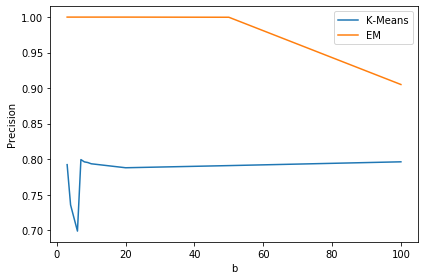

In [80]:
plt.plot('k', 'pre_KM', data = results, label = 'K-Means')
plt.plot('k', 'pre_EM', data = results, label = 'EM')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('b')
plt.tight_layout()
# plt.savefig(path_to_files + 'k_precision.png')
plt.show()

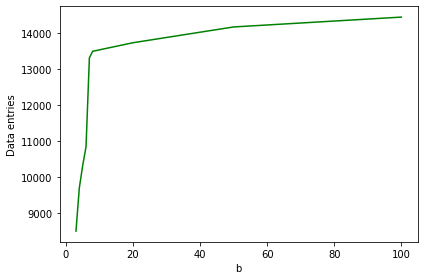

In [81]:
plt.plot('k', 'entries', data = results, label = 'Data entries', color = 'green')
plt.ylabel('Data entries')
plt.xlabel('b')
plt.tight_layout()
# plt.savefig(path_to_files + 'k_entries.png')
plt.show()

## Weight of WMA ($\alpha$)

               id        username  cluster_model_bot_prob
18131    29844579    ActorsAccess                0.000000
4043   2353506222     SharikaHohl                0.999999
12817   274925909      Snduhukire                0.000000
6181   1174927723  FeaginysdLatia                1.000000
12395   315478329      GillzReyes                0.000000
               id         username  Bot_proba  cluster_model_bot_prob
13193   247411057    carolemacneil   0.000000                0.000000
17823    47678112  howtoearnonline   0.998474                1.000000
17670    50916567       NationTV22   0.153846                0.000000
10893   466480215  MariellaFavella   0.998474                0.999999
5852   1259881759           TLB209   0.000000                0.000000
=== Confusion Matrix ===
[[13820    53]
 [ 1171  8229]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13873
           1       0.99      0.88  

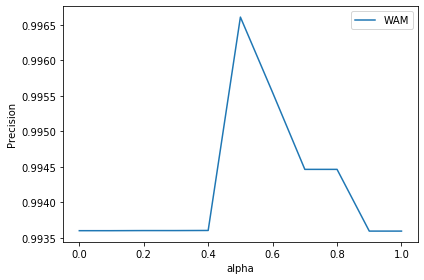

               id       username  cluster_model_bot_prob
1459   2375179495    TelmaLandey            9.999795e-01
3016   2356880179    KatieDroney            9.999999e-01
316    2787157306  dashonsarratt            0.000000e+00
11809    47509268     sarahjeong            0.000000e+00
11437    64957800  StolenNighhlm            4.944254e-41
               id        username  Bot_proba  cluster_model_bot_prob
10696   466257207  LucaGenovesi76   0.998474                     NaN
12122   339783676    AsanaJournal   0.000000                0.000000
8159    619702965     dorettadynd   0.998474                0.999983
4685   2290164373  bobbybonesshow   0.000000                0.000000
570    2906062124      skittlehes   0.011945                0.000000
=== Confusion Matrix ===
[[13365    22]
 [ 2113  7287]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     13387
           1       1.00      0.78      0.87    

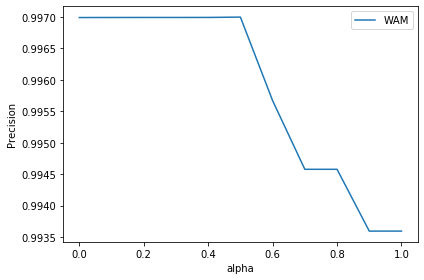

               id        username  cluster_model_bot_prob
893    2395648160     AustinDon15                0.000000
12261    99268708        kamel009                1.000000
1472   2380797054   MelitaMedcalf                1.000000
4015   2290164373  bobbybonesshow                0.000000
7272    616730427     samuelyyukt                0.999997
               id         username  Bot_proba  cluster_model_bot_prob
9828    539259954      NadiaCosimi   0.998474                     0.0
4586   2336493886      santone1973   0.000000                     0.0
5921   1208089177  HobgoodwkhJanit   0.998474                     1.0
4439   2352047742   CherriHuffines   0.998474                     1.0
14516   155097464      SyedGerdezi   0.011945                     0.0
=== Confusion Matrix ===
[[9766 1943]
 [ 681 8455]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     11709
           1       0.81      0.93      

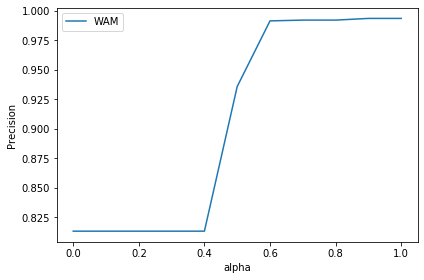

               id         username  cluster_model_bot_prob
3541   2356203122   JackiBrookover            9.693683e-01
12640   294432153        JeffHong5            2.089762e-02
4832   2259804247  alexsadietrich3           7.103229e-154
1217   2384470771      BelleKarpin            9.679539e-01
12675   291374082       lymeiguide            9.648033e-01
               id        username  Bot_proba  cluster_model_bot_prob
14222   175251304  amandamamaloco   0.011945            9.693683e-01
5423   1566113330     alligrace19   0.011945           3.993298e-140
9446    588325943      Squarology   0.061798            8.151708e-01
20209    14183021         amaalee   0.000000            3.108090e-57
15881    96871607      vega_alma7   0.998474           2.956243e-113
=== Confusion Matrix ===
[[10269  3604]
 [ 4622  4778]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.74      0.71     13873
           1       0.57      0.51  

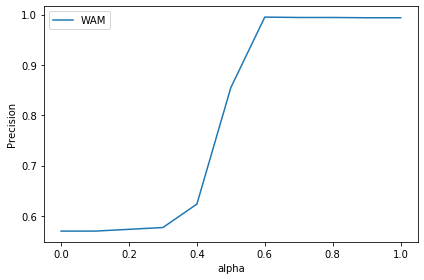

               id       username  cluster_model_bot_prob
8441    616231565    lavellegbkp                1.000000
4576   2272589820   freedomlasso                1.000000
12124   264174172  divinecabahug                0.999019
7064    994311271    baileeraee_                1.000000
12998   191725589       inasyorl                0.000000
               id      username  Bot_proba  cluster_model_bot_prob
7712    816914989   Chris1812Cj   0.000000           9.924248e-201
10457   468916873     haley0028   0.000000            1.000000e+00
4932   2220467899   LuannaLeask   0.998474            1.000000e+00
4001   2352580886  MercedezGile   0.998474            1.000000e+00
19357    18005489    divarobbie   0.000000            1.000000e+00
=== Confusion Matrix ===
[[7144 6485]
 [3144 6256]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.52      0.60     13629
           1       0.49      0.67      0.57      9400

    accu

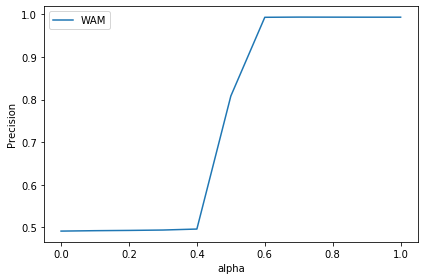

              id       username  cluster_model_bot_prob
5911   616211458       wallrkmu                     1.0
8031   128066288  andreafcarlon                     0.0
8906    48424266     PatCunnane                     0.0
8292   100288793  drcesarlozano                     0.0
3666  1671848557    AyresAlyssa                     0.0
               id       username  Bot_proba  cluster_model_bot_prob
373    3033858666     BilyangB14   0.061798                     NaN
9730    548938182   Godzdramagrl   0.011945                     0.0
14200   176469051    joeyfleszar   0.061798                     NaN
14673   144580653  alphastep2god   0.000000                     NaN
16100    83697927  Be_delpeschio   0.998474                     NaN
=== Confusion Matrix ===
[[11669    33]
 [  791  8345]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11702
           1       1.00      0.91      0.95      9136

    

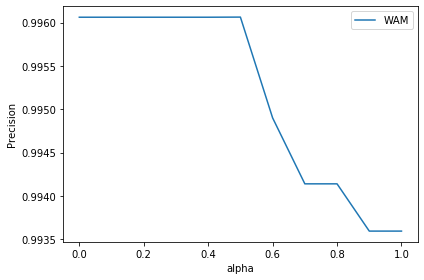

In [82]:
## Weighted Addition Model (WAM)
## vary the weight (alpha) to see its effect on the performance

features_name = ['account_metadata', 'metadata_feature', 'tweet_frequency', 'business_specific', 'content_feature', 'all_features']

cluster_entry = []
class_entry = []
threshold = 0.5 # class threshold

for i in range(len(features_name)):
    
    # model parameters
    a = []
        
    # result parameters
    pre_WAM = []
    rec_WAM = []
    f1_score_WAM = []
    acc_WAM = []
    
    wam_path = feature_path + features_name[i] + '/'
    
    # cluster model result with bot-predicted probability
    cluster_model_result = pd.read_csv(glob.glob(wam_path + '*_cluster_result.csv')[0])
    cluster_model_result = cluster_model_result.iloc[:,1:] # drop extra index column
    cluster_model_train_result = cluster_model_result.merge(train[['id', 'username']])
    print(cluster_model_train_result.sample(5))
    cluster_entry.append(len(cluster_model_train_result))
        
    # classification model result with bot-predicted probability
    class_model_train_result = pd.read_csv(glob.glob(feature_path_dt + 'all_features_train_result.csv')[0])
    class_entry.append(len(class_model_train_result))
    
    # merge both results
    model_result = class_model_train_result.merge(cluster_model_train_result, how = 'outer', on = ['id', 'username'])
    model_result1 = model_result.drop(['origin', 'dt_predict_train_all','Human_proba'], axis = 1, errors='ignore')
    print(model_result1.sample(5))
    # combine two models, as in:
    # final_bot_prob = alpha*(class_model_bot_prob) + (1-alpha)*(cluster_model_bot_prob)
    # ignore the model which can't yield result
    
    class_model_bot_prob = model_result1['Bot_proba']
    cluster_model_bot_prob = model_result1['cluster_model_bot_prob']
    
    # alpha selection
    for alpha in range(11):
    
      alpha = round(0.1*alpha,1)
      a.append(alpha)
      
      # adjust the weight when one model's prob result is nan --> give the full weight to another one
      alpha = np.array([alpha]*len(model_result1))
      alpha[np.where(np.isnan(cluster_model_bot_prob))[0]] = 1
      alpha[np.where(np.isnan(class_model_bot_prob))[0]] = 0
      
      final_bot_prob = np.nansum([alpha*(class_model_bot_prob), (1-alpha)*(cluster_model_bot_prob)], axis = 0)
    
      final_class = []

      # use threshold to classify users by their bot-predicted probability
      for i in range(len(final_bot_prob)):
        
        if final_bot_prob[i] > threshold:
          final_class.append('bot')
        elif final_bot_prob[i] < threshold:
          final_class.append('human')
        else:
          final_class.append('undecided')
    
      model_result1['predicted_class'] = final_class
    
      final_data = train[['id', 'username', 'class']].merge(model_result1, on = ['id', 'username'])
      final_data.replace(['human', 'bot', 'undecided'], [0, 1, 99], inplace = True)
      final_data['class'] = final_data['class'].astype(int)
      final_data['predicted_class'] = final_data['predicted_class'].astype(int)
    
      # confusion matrix
      print("=== Confusion Matrix ===")
      print(confusion_matrix(final_data['class'], final_data['predicted_class']))
      print('\n')
      print("=== Classification Report ===")
      print(classification_report(final_data['class'], final_data['predicted_class']))
    
      class_report = classification_report(final_data['class'], final_data['predicted_class'], output_dict = True)
    
      pre_WAM.append(class_report['1']['precision'])
      rec_WAM.append(class_report['1']['recall'])
      f1_score_WAM.append(class_report['1']['f1-score'])
      acc_WAM.append(class_report['accuracy'])

    # save the result    
    results = pd.DataFrame({'alpha': a, 'pre_WAM': pre_WAM, 'rec_WAM': rec_WAM, 'f1_WAM': f1_score_WAM, 'acc_WAM': acc_WAM,})
    results.to_csv(wam_path + 'WAM_results.csv')
    
    # draw precision plot
    plt.figure(i)
    plt.plot('alpha', 'pre_WAM', data = results, label = 'WAM')
    plt.legend()
    plt.ylabel('Precision')
    plt.xlabel('alpha')
    plt.tight_layout()
    plt.savefig(wam_path + 'precision.png')
    plt.show()

In [83]:
print('Data entries of EM over different batches of features:', cluster_entry)
print('Data entries of Tree over different batches of features:', class_entry)

Data entries of EM over different batches of features: [19889, 13688, 15695, 19889, 18182, 10365]
Data entries of Tree over different batches of features: [19699, 19699, 19699, 19699, 19699, 19699]


## p_threshold

=== Confusion Matrix ===
[[11431   266     5]
 [   62  9074     0]
 [    0     0     0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     11702
           1       0.97      0.99      0.98      9136
          99       0.00      0.00      0.00         0

    accuracy                           0.98     20838
   macro avg       0.66      0.66      0.66     20838
weighted avg       0.98      0.98      0.98     20838

=== Confusion Matrix ===
[[11575   124     3]
 [   82  9052     2]
 [    0     0     0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11702
           1       0.99      0.99      0.99      9136
          99       0.00      0.00      0.00         0

    accuracy                           0.99     20838
   macro avg       0.66      0.66      0.66     20838
weighted avg       0.99      0.99      0.99     208

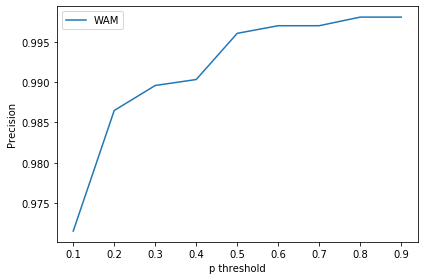

In [84]:
# model parameters
p_threshold = []

alpha = 0.5

# result parameters
pre_WAM = []
rec_WAM = []
f1_score_WAM = []
acc_WAM = []

i = features_name.index('all_features')
wam_path = path_to_files + 'Feature_Importance/' + features_name[i] + '/'

# cluster model result with bot-predicted probability
cluster_model_result = pd.read_csv(glob.glob(wam_path + '*_cluster_result.csv')[0])
cluster_model_result = cluster_model_result.iloc[:,1:] # drop extra index column
cluster_model_train_result = cluster_model_result.merge(train[['id', 'username']])


# classification model result with bot-predicted probability
class_model_train_result = pd.read_csv(glob.glob(feature_path_dt + 'all_features_train_result.csv')[0])

# merge both results
model_result = class_model_train_result.merge(cluster_model_train_result, how = 'outer', on = ['id', 'username'])
model_result1 = model_result.drop(['origin', 'dt_predict_train_all', 'Human_proba'], axis = 1)

# combine two models, as in:
# final_bot_prob = alpha*(class_model_bot_prob) + (1-alpha)*(cluster_model_bot_prob)
# ignore the model which can't yield result

class_model_bot_prob = model_result1['Bot_proba']
cluster_model_bot_prob = model_result1['cluster_model_bot_prob']

alpha = np.array([alpha]*len(model_result1))
alpha[np.where(np.isnan(cluster_model_bot_prob))[0]] = 1
alpha[np.where(np.isnan(class_model_bot_prob))[0]] = 0

final_bot_prob = np.nansum([alpha*(class_model_bot_prob), (1-alpha)*(cluster_model_bot_prob)], axis = 0)
  

for p in range(1, 10):
    
    threshold = round(p*0.1, 1) # class threshold
    p_threshold.append(threshold)
    
    final_class = []
    
    for i in range(len(final_bot_prob)):
      
      if final_bot_prob[i] > threshold:
        final_class.append('bot')
      elif final_bot_prob[i] < threshold:
        final_class.append('human')
      else:
        final_class.append('undecided')
    
    model_result1['predicted_class'] = final_class
    
    final_data = train[['id', 'username', 'class']].merge(model_result1, on = ['id', 'username'])
    final_data.replace(['human', 'bot', 'undecided'], [0, 1, 99], inplace = True)
    final_data['class'] = final_data['class'].astype(int)
    final_data['predicted_class'] = final_data['predicted_class'].astype(int)
    
    # confusion matrix
    print("=== Confusion Matrix ===")
    print(confusion_matrix(final_data['class'], final_data['predicted_class']))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(final_data['class'], final_data['predicted_class']))
    
    class_report = classification_report(final_data['class'], final_data['predicted_class'], output_dict = True)
    
    pre_WAM.append(class_report['1']['precision'])
    rec_WAM.append(class_report['1']['recall'])
    f1_score_WAM.append(class_report['1']['f1-score'])
    acc_WAM.append(class_report['accuracy'])


results = pd.DataFrame({'p_threshold': p_threshold, 'pre_WAM': pre_WAM, 'rec_WAM': rec_WAM, 'f1_WAM': f1_score_WAM, 'acc_WAM': acc_WAM,})
results.to_csv(wam_path + 'WAM_results_threshold.csv')
results

plt.figure(i)
plt.plot('p_threshold', 'pre_WAM', data = results, label = 'WAM')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('p threshold')
plt.tight_layout()
plt.savefig(wam_path + 'precision_threshold.png')
plt.show()

In [85]:
print(model_result1.predicted_class.value_counts())
model_result1.sample(5)

human    11623
bot       8323
Name: predicted_class, dtype: int64


,id,username,Bot_proba,cluster_model_bot_prob,predicted_class
5537,1433367608,IreneCamera15,0.000000,NaN,human
19818,3840981,momblogger,0.000000,0.0,human
7298,1067378947,Crawdad45,0.000000,NaN,human
0,4925593090,c_nattC,0.000000,NaN,human
13238,243850570,DylanSanchez9,0.061798,NaN,human
